# 지도시각화

+ pip install folium
+ 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

In [9]:
import folium

In [11]:
#위도와 경도를 넣어주면 지도를 그려줍니다.
#zoom_start 옵션을 넣어주면 처음부터 확대해서 보여줍니다.
#tiles로 지도형태를 바꿀 수 있습니다.
#지도에다가 내가 원하는 정보를 담아줘야 의미가 있음
#지도는 레이어, 데이터
folium.Map(location=[37.497935, 127.027522], zoom_start=15, tiles="Stamen Toner")

#### 1. 미국 50개주의 실업율 표시


In [12]:
import pandas as pd
data = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")

In [13]:
# 1. 배경이 될 지도
map = folium.Map(location=[40, -98], zoom_start=4, tiles="Stamen Toner")
# 2. 지도에 표시해둘 경계선(.json 파일)
state_geo = "data/map/folium_us-states.json"
# 3. data 준비
data = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
# 4. map.choropleth()으로 1~3 연결. key_on으로 json파일과 data를 이너조인(?)해야한다. 그래야 그 위치에 데이터를 뿌릴 수 있다.
# 색상변경 : fill_color="YlGn"
map.choropleth(geo_data = state_geo, data=data, key_on='feature.id', columns=['State', 'Unemployment'], fill_color="YlGn")
map


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Marking

In [14]:
#### 데이터를 지도에 뿌려야.
# json 형식으로 위도, 경도를 다 따야한다.
# 이 후 지도 위에 경계 따 놓은 위도와 데이터를 입혀준다.

In [15]:
kangnam_map = folium.Map(location=[37.497935, 127.027522], zoom_start=15)
kangnam_map

#표시할 데이터의 모양. 점, 원, 선 등
#popup="" 은 말풍선에 커서 올리면 정보를 띄워준다.
marker = folium.Marker(location=[37.498079643188355, 127.02871289832036], icon=folium.Icon(color="green", icon="star"), popup="스타벅스 강남R점")

#이제 마커를 지도에다가 붙여줘야한다. marker.add_to
marker.add_to(kangnam_map)
kangnam_map


In [16]:
folium.CircleMarker(location=[37.498079643188355, 127.02871289832036], radius=50, color='#ffffgg', fill_color='fffggg', popup="스타벅스 강남R점").add_to(kangnam_map)
kangnam_map

## wordcloud

+ pip install wordcloud
+ only ENGLISH

In [1]:
from wordcloud import WordCloud, STOPWORDS

In [68]:
text = open("data/wordcloud/constitution.txt")
text

<_io.TextIOWrapper name='data/wordcloud/constitution.txt' mode='r' encoding='UTF-8'>

In [69]:
# text를 읽을 땐
#read()
#readline() ...

#text는 미국 독립선언서
text.read()

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that

In [4]:
str_text = "'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that State in which he shall be chosen.\n\nRepresentatives and direct Taxes shall be apportioned among the several States which may be included within this Union, according to their respective Numbers, which shall be determined by adding to the whole Number of free Persons, including those bound to Service for a Term of Years, and excluding Indians not taxed, three fifths of all other Persons. The actual Enumeration shall be made within three Years after the first Meeting of the Congress of the United States, and within every subsequent Term of ten Years, in such Manner as they shall by Law direct. The Number of Representatives shall not exceed one for every thirty Thousand, but each State shall have at Least one Representative; and until such enumeration shall be made, the State of New Hampshire shall be entitled to chuse three, Massachusetts eight, Rhode-Island and Providence Plantations one, Connecticut five, New-York six, New Jersey four, Pennsylvania eight, Delaware one, Maryland six, Virginia ten, North Carolina five, South Carolina five, and Georgia three.\n\nWhen vacancies happen in the Representation from any State, the Executive Authority thereof shall issue Writs of Election to fill such Vacancies.\n\nThe House of Representatives shall chuse their Speaker and other Officers; and shall have the sole Power of Impeachment.\n\nSection. 3.\n\nThe Senate of the United States shall be composed of two Senators from each State, chosen by the Legislature thereof for six Years; and each Senator shall have one Vote.\n\nImmediately after they shall be assembled in Consequence of the first Election, they shall be divided as equally as may be into three Classes. The Seats of the Senators of the first Class shall be vacated at the Expiration of the second Year, of the second Class at the Expiration of the fourth Year, and of the third Class at the Expiration of the sixth Year, so that one third may be chosen every second Year; and if Vacancies happen by Resignation, or otherwise, during the Recess of the Legislature of any State, the Executive thereof may make temporary Appointments until the next Meeting of the Legislature, which shall then fill such Vacancies.\n\nNo Person shall be a Senator who shall not have attained to the Age of thirty Years, and been nine Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that State for which he shall be chosen.\n\nThe Vice President of the United States shall be President of the Senate, but shall have no Vote, unless they be equally divided.\n\nThe Senate shall chuse their other Officers, and also a President pro tempore, in the Absence of the Vice President, or when he shall exercise the Office of President of the United States.\n\nThe Senate shall have the sole Power to try all Impeachments. When sitting for that Purpose, they shall be on Oath or Affirmation. When the President of the United States is tried, the Chief Justice shall preside: And no Person shall be convicted without the Concurrence of two thirds of the Members present.\n\nJudgment in Cases of Impeachment shall not extend further than to removal from Office, and disqualification to hold and enjoy any Office of honor, Trust or Profit under the United States: but the Party convicted shall nevertheless be liable and subject to Indictment, Trial, Judgment and Punishment, according to Law.\n\nSection. 4.\n\nThe Times, Places and Manner of holding Elections for Senators and Representatives, shall be prescribed in each State by the Legislature thereof; but the Congress may at any time by Law make or alter such Regulations, except as to the Places of chusing Senators.\n\nThe Congress shall assemble at least once in every Year, and such Meeting shall be on the first Monday in December, unless they shall by Law appoint a different Day.\n\nSection. 5.\n\nEach House shall be the Judge of the Elections, Returns and Qualifications of its own Members, and a Majority of each shall constitute a Quorum to do Business; but a smaller Number may adjourn from day to day, and may be authorized to compel the Attendance of absent Members, in such Manner, and under such Penalties as each House may provide.\n\nEach House may determine the Rules of its Proceedings, punish its Members for disorderly Behaviour, and, with the Concurrence of two thirds, expel a Member.\n\nEach House shall keep a Journal of its Proceedings, and from time to time publish the same, excepting such Parts as may in their Judgment require Secrecy; and the Yeas and Nays of the Members of either House on any question shall, at the Desire of one fifth of those Present, be entered on the Journal.\n\nNeither House, during the Session of Congress, shall, without the Consent of the other, adjourn for more than three days, nor to any other Place than that in which the two Houses shall be sitting.\n\nSection. 6.\n\nThe Senators and Representatives shall receive a Compensation for their Services, to be ascertained by Law, and paid out of the Treasury of the United States. They shall in all Cases, except Treason, Felony and Breach of the Peace, be privileged from Arrest during their Attendance at the Session of their respective Houses, and in going to and returning from the same; and for any Speech or Debate in either House, they shall not be questioned in any other Place.\n\nNo Senator or Representative shall, during the Time for which he was elected, be appointed to any civil Office under the Authority of the United States, which shall have been created, or the Emoluments whereof shall have been encreased during such time; and no Person holding any Office under the United States, shall be a Member of either House during his Continuance in Office.\n\nSection. 7.\n\nAll Bills for raising Revenue shall originate in the House of Representatives; but the Senate may propose or concur with Amendments as on other Bills.\n\nEvery Bill which shall have passed the House of Representatives and the Senate, shall, before it become a Law, be presented to the President of the United States: If he approve he shall sign it, but if not he shall return it, with his Objections to that House in which it shall have originated, who shall enter the Objections at large on their Journal, and proceed to reconsider it. If after such Reconsideration two thirds of that House shall agree to pass the Bill, it shall be sent, together with the Objections, to the other House, by which it shall likewise be reconsidered, and if approved by two thirds of that House, it shall become a Law. But in all such Cases the Votes of both Houses shall be determined by yeas and Nays, and the Names of the Persons voting for and against the Bill shall be entered on the Journal of each House respectively. If any Bill shall not be returned by the President within ten Days (Sundays excepted) after it shall have been presented to him, the Same shall be a Law, in like Manner as if he had signed it, unless the Congress by their Adjournment prevent its Return, in which Case it shall not be a Law.\n\nEvery Order, Resolution, or Vote to which the Concurrence of the Senate and House of Representatives may be necessary (except on a question of Adjournment) shall be presented to the President of the United States; and before the Same shall take Effect, shall be approved by him, or being disapproved by him, shall be repassed by two thirds of the Senate and House of Representatives, according to the Rules and Limitations prescribed in the Case of a Bill.\n\nSection. 8.\n\nThe Congress shall have Power To lay and collect Taxes, Duties, Imposts and Excises, to pay the Debts and provide for the common Defence and general Welfare of the United States; but all Duties, Imposts and Excises shall be uniform throughout the United States;\n\nTo borrow Money on the credit of the United States;\n\nTo regulate Commerce with foreign Nations, and among the several States, and with the Indian Tribes;\n\nTo establish an uniform Rule of Naturalization, and uniform Laws on the subject of Bankruptcies throughout the United States;\n\nTo coin Money, regulate the Value thereof, and of foreign Coin, and fix the Standard of Weights and Measures;\n\nTo provide for the Punishment of counterfeiting the Securities and current Coin of the United States;\n\nTo establish Post Offices and post Roads;\n\nTo promote the Progress of Science and useful Arts, by securing for limited Times to Authors and Inventors the exclusive Right to their respective Writings and Discoveries;\n\nTo constitute Tribunals inferior to the supreme Court;\n\nTo define and punish Piracies and Felonies committed on the high Seas, and Offences against the Law of Nations;\n\nTo declare War, grant Letters of Marque and Reprisal, and make Rules concerning Captures on Land and Water;\n\nTo raise and support Armies, but no Appropriation of Money"

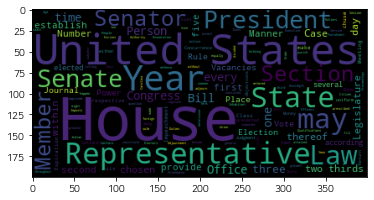

In [76]:
wc = WordCloud().generate(str_text)
wc

wc.words_
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

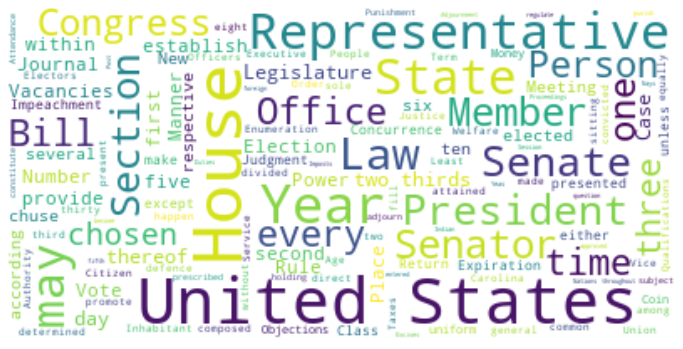

In [88]:
wc = WordCloud(max_font_size=40, background_color="white").generate(str_text)
wc
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear") #interpolation="bilinear" 정렬 명령어
plt.axis('off')

In [5]:
from PIL import Image

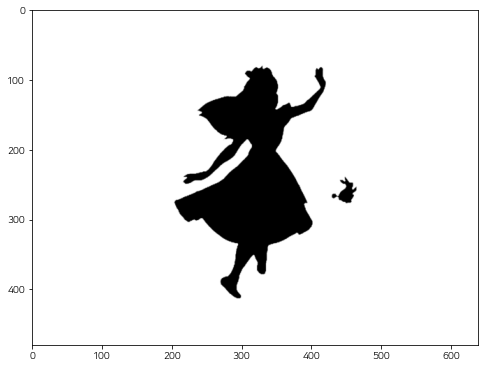

In [80]:
alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))
plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

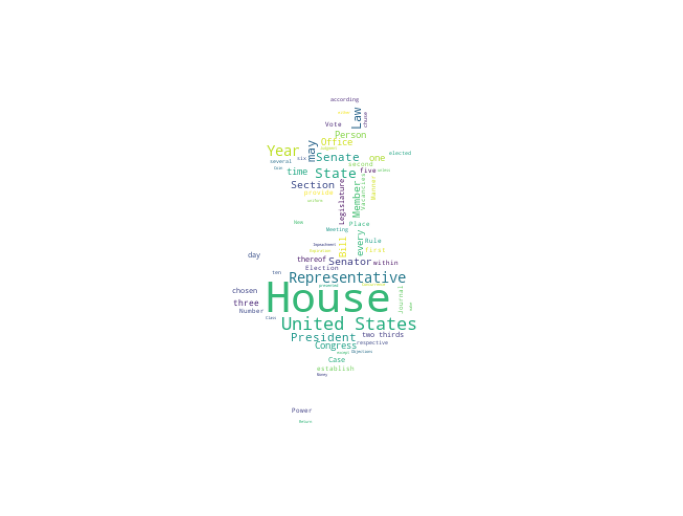

In [81]:
wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask).generate(str_text)
wc
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')

In [94]:
text = open("data/wordcloud/alice.txt")

(-0.5, 639.5, 479.5, -0.5)

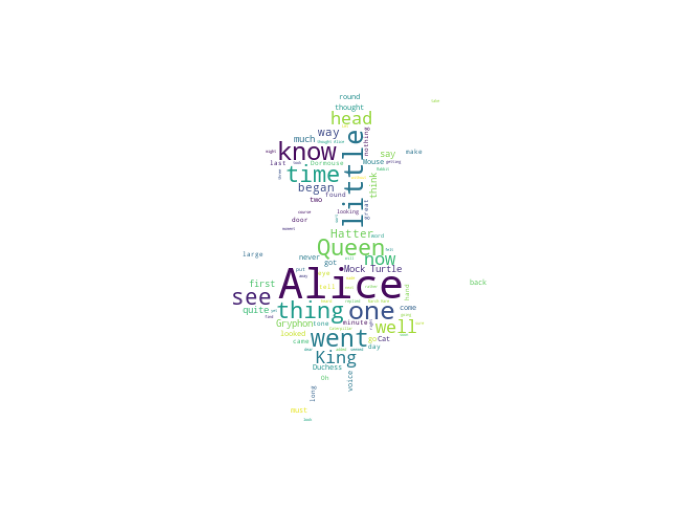

In [98]:
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask, max_words=100, stopwords=stopwords).generate(alice)
wc

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')

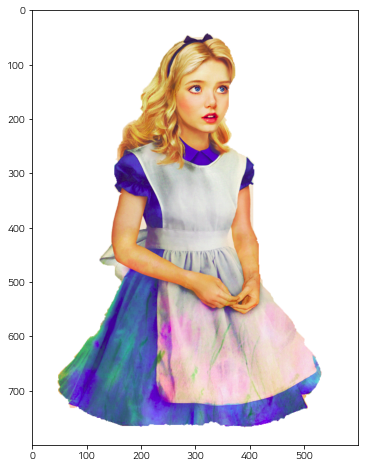

In [99]:
alice_color = np.array(Image.open("data/wordcloud/alice.png"))
plt.figure(figsize=(8,8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

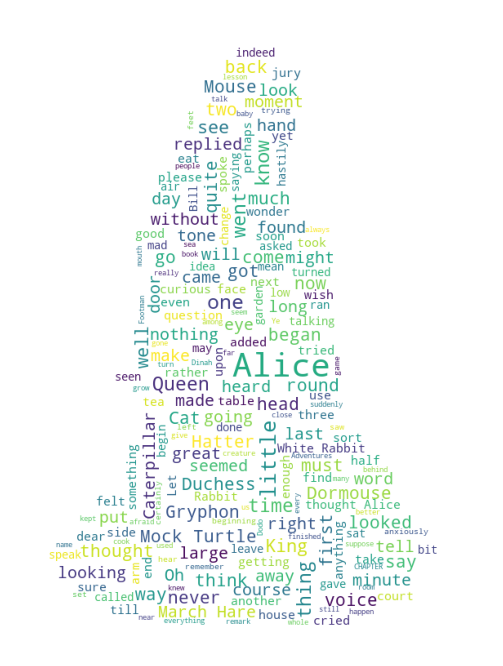

In [100]:
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color, max_words=200, stopwords=stopwords).generate(alice)
wc

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

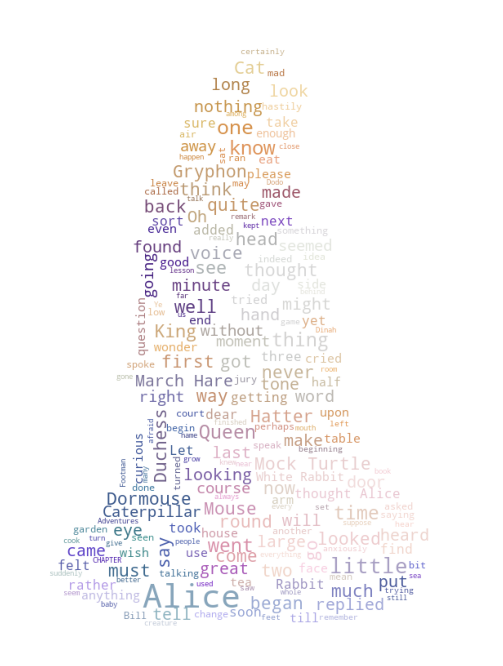

In [102]:
stopwords = set(STOPWORDS)
stopwords.add("said")

import wordcloud
wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color, max_words=200, stopwords=stopwords).generate(alice)

image_color = wordcloud.ImageColorGenerator(alice_color)

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

In [3]:
# 터미널에서 설치할 때 버전 지정해주기
# pip install tweepy==3.10.0

import tweepy
tweepy.__version__

'4.3.0'

In [1]:
from konlpy.tag import Kkma
from konlpy.tag import Okt

In [2]:
kkma = Kkma()
kkma.nouns("아버지가가방에들어가신다")

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/lib/libjli.dylib


In [3]:
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [4]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.noun(ko_text)
token_ko

# 불용어 처리
stop_words = ["제", "월", "일", "조", "때", "그", "이", "바", "및", "안", "정", "위", "관"]

# 형태소가 저장된 token_ko에서 불용어 처리 빼고 저장
for i in token_ko:
    if i in stop_words:
        token_ko.remove(i)

print(len(token_ko))

# 워드 카운팅
ko = nltk.Text(token_ko, name = "대한민국 헌법")
dir(ko)
data = ko.vocab().most_common(50)

wc = WordCloud(max_font_size=40, background_color="white", font_path='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/lib/libjli.dylib


In [96]:
alice="""
Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but when the Rabbit actually TOOK A WATCH
OUT OF ITS WAISTCOAT-POCKET, and looked at it, and then hurried on,
Alice started to her feet, for it flashed across her mind that she had
never before seen a rabbit with either a waistcoat-pocket, or a watch
to take out of it, and burning with curiosity, she ran across the field
after it, and fortunately was just in time to see it pop down a large
rabbit-hole under the hedge.

In another moment down went Alice after it, never once considering how
in the world she was to get out again.

The rabbit-hole went straight on like a tunnel for some way, and then
dipped suddenly down, so suddenly that Alice had not a moment to think
about stopping herself before she found herself falling down a very deep
well.

Either the well was very deep, or she fell very slowly, for she had
plenty of time as she went down to look about her and to wonder what was
going to happen next. First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she
looked at the sides of the well, and noticed that they were filled with
cupboards and book-shelves; here and there she saw maps and pictures
hung upon pegs. She took down a jar from one of the shelves as
she passed; it was labelled 'ORANGE MARMALADE', but to her great
disappointment it was empty: she did not like to drop the jar for fear
of killing somebody, so managed to put it into one of the cupboards as
she fell past it.

'Well!' thought Alice to herself, 'after such a fall as this, I shall
think nothing of tumbling down stairs! How brave they'll all think me at
home! Why, I wouldn't say anything about it, even if I fell off the top
of the house!' (Which was very likely true.)

Down, down, down. Would the fall NEVER come to an end! 'I wonder how
many miles I've fallen by this time?' she said aloud. 'I must be getting
somewhere near the centre of the earth. Let me see: that would be four
thousand miles down, I think--' (for, you see, Alice had learnt several
things of this sort in her lessons in the schoolroom, and though this
was not a VERY good opportunity for showing off her knowledge, as there
was no one to listen to her, still it was good practice to say it over)
'--yes, that's about the right distance--but then I wonder what Latitude
or Longitude I've got to?' (Alice had no idea what Latitude was, or
Longitude either, but thought they were nice grand words to say.)

Presently she began again. 'I wonder if I shall fall right THROUGH the
earth! How funny it'll seem to come out among the people that walk with
their heads downward! The Antipathies, I think--' (she was rather glad
there WAS no one listening, this time, as it didn't sound at all the
right word) '--but I shall have to ask them what the name of the country
is, you know. Please, Ma'am, is this New Zealand or Australia?' (and
she tried to curtsey as she spoke--fancy CURTSEYING as you're falling
through the air! Do you think you could manage it?) 'And what an
ignorant little girl she'll think me for asking! No, it'll never do to
ask: perhaps I shall see it written up somewhere.'

Down, down, down. There was nothing else to do, so Alice soon began
talking again. 'Dinah'll miss me very much to-night, I should think!'
(Dinah was the cat.) 'I hope they'll remember her saucer of milk at
tea-time. Dinah my dear! I wish you were down here with me! There are no
mice in the air, I'm afraid, but you might catch a bat, and that's very
like a mouse, you know. But do cats eat bats, I wonder?' And here Alice
began to get rather sleepy, and went on saying to herself, in a dreamy
sort of way, 'Do cats eat bats? Do cats eat bats?' and sometimes, 'Do
bats eat cats?' for, you see, as she couldn't answer either question,
it didn't much matter which way she put it. She felt that she was dozing
off, and had just begun to dream that she was walking hand in hand with
Dinah, and saying to her very earnestly, 'Now, Dinah, tell me the truth:
did you ever eat a bat?' when suddenly, thump! thump! down she came upon
a heap of sticks and dry leaves, and the fall was over.

Alice was not a bit hurt, and she jumped up on to her feet in a moment:
she looked up, but it was all dark overhead; before her was another
long passage, and the White Rabbit was still in sight, hurrying down it.
There was not a moment to be lost: away went Alice like the wind, and
was just in time to hear it say, as it turned a corner, 'Oh my ears
and whiskers, how late it's getting!' She was close behind it when she
turned the corner, but the Rabbit was no longer to be seen: she found
herself in a long, low hall, which was lit up by a row of lamps hanging
from the roof.

There were doors all round the hall, but they were all locked; and when
Alice had been all the way down one side and up the other, trying every
door, she walked sadly down the middle, wondering how she was ever to
get out again.

Suddenly she came upon a little three-legged table, all made of solid
glass; there was nothing on it except a tiny golden key, and Alice's
first thought was that it might belong to one of the doors of the hall;
but, alas! either the locks were too large, or the key was too small,
but at any rate it would not open any of them. However, on the second
time round, she came upon a low curtain she had not noticed before, and
behind it was a little door about fifteen inches high: she tried the
little golden key in the lock, and to her great delight it fitted!

Alice opened the door and found that it led into a small passage, not
much larger than a rat-hole: she knelt down and looked along the passage
into the loveliest garden you ever saw. How she longed to get out of
that dark hall, and wander about among those beds of bright flowers and
those cool fountains, but she could not even get her head through the
doorway; 'and even if my head would go through,' thought poor Alice, 'it
would be of very little use without my shoulders. Oh, how I wish I could
shut up like a telescope! I think I could, if I only know how to begin.'
For, you see, so many out-of-the-way things had happened lately,
that Alice had begun to think that very few things indeed were really
impossible.

There seemed to be no use in waiting by the little door, so she went
back to the table, half hoping she might find another key on it, or at
any rate a book of rules for shutting people up like telescopes: this
time she found a little bottle on it, ('which certainly was not here
before,' said Alice,) and round the neck of the bottle was a paper
label, with the words 'DRINK ME' beautifully printed on it in large
letters.

It was all very well to say 'Drink me,' but the wise little Alice was
not going to do THAT in a hurry. 'No, I'll look first,' she said, 'and
see whether it's marked "poison" or not'; for she had read several nice
little histories about children who had got burnt, and eaten up by wild
beasts and other unpleasant things, all because they WOULD not remember
the simple rules their friends had taught them: such as, that a red-hot
poker will burn you if you hold it too long; and that if you cut your
finger VERY deeply with a knife, it usually bleeds; and she had never
forgotten that, if you drink much from a bottle marked 'poison,' it is
almost certain to disagree with you, sooner or later.

However, this bottle was NOT marked 'poison,' so Alice ventured to taste
it, and finding it very nice, (it had, in fact, a sort of mixed flavour
of cherry-tart, custard, pine-apple, roast turkey, toffee, and hot
buttered toast,) she very soon finished it off.

  *    *    *    *    *    *    *

    *    *    *    *    *    *

  *    *    *    *    *    *    *

'What a curious feeling!' said Alice; 'I must be shutting up like a
telescope.'

And so it was indeed: she was now only ten inches high, and her face
brightened up at the thought that she was now the right size for going
through the little door into that lovely garden. First, however, she
waited for a few minutes to see if she was going to shrink any further:
she felt a little nervous about this; 'for it might end, you know,' said
Alice to herself, 'in my going out altogether, like a candle. I wonder
what I should be like then?' And she tried to fancy what the flame of a
candle is like after the candle is blown out, for she could not remember
ever having seen such a thing.

After a while, finding that nothing more happened, she decided on going
into the garden at once; but, alas for poor Alice! when she got to the
door, she found she had forgotten the little golden key, and when she
went back to the table for it, she found she could not possibly reach
it: she could see it quite plainly through the glass, and she tried her
best to climb up one of the legs of the table, but it was too slippery;
and when she had tired herself out with trying, the poor little thing
sat down and cried.

'Come, there's no use in crying like that!' said Alice to herself,
rather sharply; 'I advise you to leave off this minute!' She generally
gave herself very good advice, (though she very seldom followed it),
and sometimes she scolded herself so severely as to bring tears into
her eyes; and once she remembered trying to box her own ears for having
cheated herself in a game of croquet she was playing against herself,
for this curious child was very fond of pretending to be two people.
'But it's no use now,' thought poor Alice, 'to pretend to be two people!
Why, there's hardly enough of me left to make ONE respectable person!'

Soon her eye fell on a little glass box that was lying under the table:
she opened it, and found in it a very small cake, on which the words
'EAT ME' were beautifully marked in currants. 'Well, I'll eat it,' said
Alice, 'and if it makes me grow larger, I can reach the key; and if it
makes me grow smaller, I can creep under the door; so either way I'll
get into the garden, and I don't care which happens!'

She ate a little bit, and said anxiously to herself, 'Which way? Which
way?', holding her hand on the top of her head to feel which way it was
growing, and she was quite surprised to find that she remained the same
size: to be sure, this generally happens when one eats cake, but Alice
had got so much into the way of expecting nothing but out-of-the-way
things to happen, that it seemed quite dull and stupid for life to go on
in the common way.

So she set to work, and very soon finished off the cake.

  *    *    *    *    *    *    *

    *    *    *    *    *    *

  *    *    *    *    *    *    *




CHAPTER II. The Pool of Tears

'Curiouser and curiouser!' cried Alice (she was so much surprised, that
for the moment she quite forgot how to speak good English); 'now I'm
opening out like the largest telescope that ever was! Good-bye, feet!'
(for when she looked down at her feet, they seemed to be almost out of
sight, they were getting so far off). 'Oh, my poor little feet, I wonder
who will put on your shoes and stockings for you now, dears? I'm sure
_I_ shan't be able! I shall be a great deal too far off to trouble
myself about you: you must manage the best way you can;--but I must be
kind to them,' thought Alice, 'or perhaps they won't walk the way I want
to go! Let me see: I'll give them a new pair of boots every Christmas.'

And she went on planning to herself how she would manage it. 'They must
go by the carrier,' she thought; 'and how funny it'll seem, sending
presents to one's own feet! And how odd the directions will look!

     ALICE'S RIGHT FOOT, ESQ.
       HEARTHRUG,
         NEAR THE FENDER,
           (WITH ALICE'S LOVE).

Oh dear, what nonsense I'm talking!'

Just then her head struck against the roof of the hall: in fact she was
now more than nine feet high, and she at once took up the little golden
key and hurried off to the garden door.

Poor Alice! It was as much as she could do, lying down on one side, to
look through into the garden with one eye; but to get through was more
hopeless than ever: she sat down and began to cry again.

'You ought to be ashamed of yourself,' said Alice, 'a great girl like
you,' (she might well say this), 'to go on crying in this way! Stop this
moment, I tell you!' But she went on all the same, shedding gallons of
tears, until there was a large pool all round her, about four inches
deep and reaching half down the hall.

After a time she heard a little pattering of feet in the distance, and
she hastily dried her eyes to see what was coming. It was the White
Rabbit returning, splendidly dressed, with a pair of white kid gloves in
one hand and a large fan in the other: he came trotting along in a great
hurry, muttering to himself as he came, 'Oh! the Duchess, the Duchess!
Oh! won't she be savage if I've kept her waiting!' Alice felt so
desperate that she was ready to ask help of any one; so, when the Rabbit
came near her, she began, in a low, timid voice, 'If you please, sir--'
The Rabbit started violently, dropped the white kid gloves and the fan,
and skurried away into the darkness as hard as he could go.

Alice took up the fan and gloves, and, as the hall was very hot, she
kept fanning herself all the time she went on talking: 'Dear, dear! How
queer everything is to-day! And yesterday things went on just as usual.
I wonder if I've been changed in the night? Let me think: was I the
same when I got up this morning? I almost think I can remember feeling a
little different. But if I'm not the same, the next question is, Who
in the world am I? Ah, THAT'S the great puzzle!' And she began thinking
over all the children she knew that were of the same age as herself, to
see if she could have been changed for any of them.

'I'm sure I'm not Ada,' she said, 'for her hair goes in such long
ringlets, and mine doesn't go in ringlets at all; and I'm sure I can't
be Mabel, for I know all sorts of things, and she, oh! she knows such a
very little! Besides, SHE'S she, and I'm I, and--oh dear, how puzzling
it all is! I'll try if I know all the things I used to know. Let me
see: four times five is twelve, and four times six is thirteen, and
four times seven is--oh dear! I shall never get to twenty at that rate!
However, the Multiplication Table doesn't signify: let's try Geography.
London is the capital of Paris, and Paris is the capital of Rome, and
Rome--no, THAT'S all wrong, I'm certain! I must have been changed for
Mabel! I'll try and say "How doth the little--"' and she crossed her
hands on her lap as if she were saying lessons, and began to repeat it,
but her voice sounded hoarse and strange, and the words did not come the
same as they used to do:--

     'How doth the little crocodile
      Improve his shining tail,
     And pour the waters of the Nile
      On every golden scale!

     'How cheerfully he seems to grin,
      How neatly spread his claws,
     And welcome little fishes in
      With gently smiling jaws!'

'I'm sure those are not the right words,' said poor Alice, and her eyes
filled with tears again as she went on, 'I must be Mabel after all, and
I shall have to go and live in that poky little house, and have next to
no toys to play with, and oh! ever so many lessons to learn! No, I've
made up my mind about it; if I'm Mabel, I'll stay down here! It'll be no
use their putting their heads down and saying "Come up again, dear!" I
shall only look up and say "Who am I then? Tell me that first, and then,
if I like being that person, I'll come up: if not, I'll stay down here
till I'm somebody else"--but, oh dear!' cried Alice, with a sudden burst
of tears, 'I do wish they WOULD put their heads down! I am so VERY tired
of being all alone here!'

As she said this she looked down at her hands, and was surprised to see
that she had put on one of the Rabbit's little white kid gloves while
she was talking. 'How CAN I have done that?' she thought. 'I must
be growing small again.' She got up and went to the table to measure
herself by it, and found that, as nearly as she could guess, she was now
about two feet high, and was going on shrinking rapidly: she soon found
out that the cause of this was the fan she was holding, and she dropped
it hastily, just in time to avoid shrinking away altogether.

'That WAS a narrow escape!' said Alice, a good deal frightened at the
sudden change, but very glad to find herself still in existence; 'and
now for the garden!' and she ran with all speed back to the little door:
but, alas! the little door was shut again, and the little golden key was
lying on the glass table as before, 'and things are worse than ever,'
thought the poor child, 'for I never was so small as this before, never!
And I declare it's too bad, that it is!'

As she said these words her foot slipped, and in another moment, splash!
she was up to her chin in salt water. Her first idea was that she
had somehow fallen into the sea, 'and in that case I can go back by
railway,' she said to herself. (Alice had been to the seaside once in
her life, and had come to the general conclusion, that wherever you go
to on the English coast you find a number of bathing machines in the
sea, some children digging in the sand with wooden spades, then a row
of lodging houses, and behind them a railway station.) However, she soon
made out that she was in the pool of tears which she had wept when she
was nine feet high.

'I wish I hadn't cried so much!' said Alice, as she swam about, trying
to find her way out. 'I shall be punished for it now, I suppose, by
being drowned in my own tears! That WILL be a queer thing, to be sure!
However, everything is queer to-day.'

Just then she heard something splashing about in the pool a little way
off, and she swam nearer to make out what it was: at first she thought
it must be a walrus or hippopotamus, but then she remembered how small
she was now, and she soon made out that it was only a mouse that had
slipped in like herself.

'Would it be of any use, now,' thought Alice, 'to speak to this mouse?
Everything is so out-of-the-way down here, that I should think very
likely it can talk: at any rate, there's no harm in trying.' So she
began: 'O Mouse, do you know the way out of this pool? I am very tired
of swimming about here, O Mouse!' (Alice thought this must be the right
way of speaking to a mouse: she had never done such a thing before, but
she remembered having seen in her brother's Latin Grammar, 'A mouse--of
a mouse--to a mouse--a mouse--O mouse!') The Mouse looked at her rather
inquisitively, and seemed to her to wink with one of its little eyes,
but it said nothing.

'Perhaps it doesn't understand English,' thought Alice; 'I daresay it's
a French mouse, come over with William the Conqueror.' (For, with all
her knowledge of history, Alice had no very clear notion how long ago
anything had happened.) So she began again: 'Ou est ma chatte?' which
was the first sentence in her French lesson-book. The Mouse gave a
sudden leap out of the water, and seemed to quiver all over with fright.
'Oh, I beg your pardon!' cried Alice hastily, afraid that she had hurt
the poor animal's feelings. 'I quite forgot you didn't like cats.'

'Not like cats!' cried the Mouse, in a shrill, passionate voice. 'Would
YOU like cats if you were me?'

'Well, perhaps not,' said Alice in a soothing tone: 'don't be angry
about it. And yet I wish I could show you our cat Dinah: I think you'd
take a fancy to cats if you could only see her. She is such a dear quiet
thing,' Alice went on, half to herself, as she swam lazily about in the
pool, 'and she sits purring so nicely by the fire, licking her paws and
washing her face--and she is such a nice soft thing to nurse--and she's
such a capital one for catching mice--oh, I beg your pardon!' cried
Alice again, for this time the Mouse was bristling all over, and she
felt certain it must be really offended. 'We won't talk about her any
more if you'd rather not.'

'We indeed!' cried the Mouse, who was trembling down to the end of his
tail. 'As if I would talk on such a subject! Our family always HATED
cats: nasty, low, vulgar things! Don't let me hear the name again!'

'I won't indeed!' said Alice, in a great hurry to change the subject of
conversation. 'Are you--are you fond--of--of dogs?' The Mouse did not
answer, so Alice went on eagerly: 'There is such a nice little dog near
our house I should like to show you! A little bright-eyed terrier, you
know, with oh, such long curly brown hair! And it'll fetch things when
you throw them, and it'll sit up and beg for its dinner, and all sorts
of things--I can't remember half of them--and it belongs to a farmer,
you know, and he says it's so useful, it's worth a hundred pounds! He
says it kills all the rats and--oh dear!' cried Alice in a sorrowful
tone, 'I'm afraid I've offended it again!' For the Mouse was swimming
away from her as hard as it could go, and making quite a commotion in
the pool as it went.

So she called softly after it, 'Mouse dear! Do come back again, and we
won't talk about cats or dogs either, if you don't like them!' When the
Mouse heard this, it turned round and swam slowly back to her: its
face was quite pale (with passion, Alice thought), and it said in a low
trembling voice, 'Let us get to the shore, and then I'll tell you my
history, and you'll understand why it is I hate cats and dogs.'

It was high time to go, for the pool was getting quite crowded with the
birds and animals that had fallen into it: there were a Duck and a Dodo,
a Lory and an Eaglet, and several other curious creatures. Alice led the
way, and the whole party swam to the shore.




CHAPTER III. A Caucus-Race and a Long Tale

They were indeed a queer-looking party that assembled on the bank--the
birds with draggled feathers, the animals with their fur clinging close
to them, and all dripping wet, cross, and uncomfortable.

The first question of course was, how to get dry again: they had a
consultation about this, and after a few minutes it seemed quite natural
to Alice to find herself talking familiarly with them, as if she had
known them all her life. Indeed, she had quite a long argument with the
Lory, who at last turned sulky, and would only say, 'I am older than
you, and must know better'; and this Alice would not allow without
knowing how old it was, and, as the Lory positively refused to tell its
age, there was no more to be said.

At last the Mouse, who seemed to be a person of authority among them,
called out, 'Sit down, all of you, and listen to me! I'LL soon make you
dry enough!' They all sat down at once, in a large ring, with the Mouse
in the middle. Alice kept her eyes anxiously fixed on it, for she felt
sure she would catch a bad cold if she did not get dry very soon.

'Ahem!' said the Mouse with an important air, 'are you all ready? This
is the driest thing I know. Silence all round, if you please! "William
the Conqueror, whose cause was favoured by the pope, was soon submitted
to by the English, who wanted leaders, and had been of late much
accustomed to usurpation and conquest. Edwin and Morcar, the earls of
Mercia and Northumbria--"'

'Ugh!' said the Lory, with a shiver.

'I beg your pardon!' said the Mouse, frowning, but very politely: 'Did
you speak?'

'Not I!' said the Lory hastily.

'I thought you did,' said the Mouse. '--I proceed. "Edwin and Morcar,
the earls of Mercia and Northumbria, declared for him: and even Stigand,
the patriotic archbishop of Canterbury, found it advisable--"'

'Found WHAT?' said the Duck.

'Found IT,' the Mouse replied rather crossly: 'of course you know what
"it" means.'

'I know what "it" means well enough, when I find a thing,' said the
Duck: 'it's generally a frog or a worm. The question is, what did the
archbishop find?'

The Mouse did not notice this question, but hurriedly went on, '"--found
it advisable to go with Edgar Atheling to meet William and offer him the
crown. William's conduct at first was moderate. But the insolence of his
Normans--" How are you getting on now, my dear?' it continued, turning
to Alice as it spoke.

'As wet as ever,' said Alice in a melancholy tone: 'it doesn't seem to
dry me at all.'

'In that case,' said the Dodo solemnly, rising to its feet, 'I move
that the meeting adjourn, for the immediate adoption of more energetic
remedies--'

'Speak English!' said the Eaglet. 'I don't know the meaning of half
those long words, and, what's more, I don't believe you do either!' And
the Eaglet bent down its head to hide a smile: some of the other birds
tittered audibly.

'What I was going to say,' said the Dodo in an offended tone, 'was, that
the best thing to get us dry would be a Caucus-race.'

'What IS a Caucus-race?' said Alice; not that she wanted much to know,
but the Dodo had paused as if it thought that SOMEBODY ought to speak,
and no one else seemed inclined to say anything.

'Why,' said the Dodo, 'the best way to explain it is to do it.' (And, as
you might like to try the thing yourself, some winter day, I will tell
you how the Dodo managed it.)

First it marked out a race-course, in a sort of circle, ('the exact
shape doesn't matter,' it said,) and then all the party were placed
along the course, here and there. There was no 'One, two, three, and
away,' but they began running when they liked, and left off when they
liked, so that it was not easy to know when the race was over. However,
when they had been running half an hour or so, and were quite dry again,
the Dodo suddenly called out 'The race is over!' and they all crowded
round it, panting, and asking, 'But who has won?'

This question the Dodo could not answer without a great deal of thought,
and it sat for a long time with one finger pressed upon its forehead
(the position in which you usually see Shakespeare, in the pictures
of him), while the rest waited in silence. At last the Dodo said,
'EVERYBODY has won, and all must have prizes.'

'But who is to give the prizes?' quite a chorus of voices asked.

'Why, SHE, of course,' said the Dodo, pointing to Alice with one finger;
and the whole party at once crowded round her, calling out in a confused
way, 'Prizes! Prizes!'

Alice had no idea what to do, and in despair she put her hand in her
pocket, and pulled out a box of comfits, (luckily the salt water had
not got into it), and handed them round as prizes. There was exactly one
a-piece all round.

'But she must have a prize herself, you know,' said the Mouse.

'Of course,' the Dodo replied very gravely. 'What else have you got in
your pocket?' he went on, turning to Alice.

'Only a thimble,' said Alice sadly.

'Hand it over here,' said the Dodo.

Then they all crowded round her once more, while the Dodo solemnly
presented the thimble, saying 'We beg your acceptance of this elegant
thimble'; and, when it had finished this short speech, they all cheered.

Alice thought the whole thing very absurd, but they all looked so grave
that she did not dare to laugh; and, as she could not think of anything
to say, she simply bowed, and took the thimble, looking as solemn as she
could.

The next thing was to eat the comfits: this caused some noise and
confusion, as the large birds complained that they could not taste
theirs, and the small ones choked and had to be patted on the back.
However, it was over at last, and they sat down again in a ring, and
begged the Mouse to tell them something more.

'You promised to tell me your history, you know,' said Alice, 'and why
it is you hate--C and D,' she added in a whisper, half afraid that it
would be offended again.

'Mine is a long and a sad tale!' said the Mouse, turning to Alice, and
sighing.

'It IS a long tail, certainly,' said Alice, looking down with wonder at
the Mouse's tail; 'but why do you call it sad?' And she kept on puzzling
about it while the Mouse was speaking, so that her idea of the tale was
something like this:--

         'Fury said to a
         mouse, That he
        met in the
       house,
     "Let us
      both go to
       law: I will
        prosecute
         YOU.--Come,
           I'll take no
           denial; We
          must have a
        trial: For
      really this
     morning I've
    nothing
    to do."
     Said the
      mouse to the
       cur, "Such
        a trial,
         dear Sir,
            With
          no jury
        or judge,
       would be
      wasting
      our
      breath."
       "I'll be
        judge, I'll
         be jury,"
            Said
         cunning
          old Fury:
          "I'll
          try the
            whole
            cause,
              and
           condemn
           you
          to
           death."'


'You are not attending!' said the Mouse to Alice severely. 'What are you
thinking of?'

'I beg your pardon,' said Alice very humbly: 'you had got to the fifth
bend, I think?'

'I had NOT!' cried the Mouse, sharply and very angrily.

'A knot!' said Alice, always ready to make herself useful, and looking
anxiously about her. 'Oh, do let me help to undo it!'

'I shall do nothing of the sort,' said the Mouse, getting up and walking
away. 'You insult me by talking such nonsense!'

'I didn't mean it!' pleaded poor Alice. 'But you're so easily offended,
you know!'

The Mouse only growled in reply.

'Please come back and finish your story!' Alice called after it; and the
others all joined in chorus, 'Yes, please do!' but the Mouse only shook
its head impatiently, and walked a little quicker.

'What a pity it wouldn't stay!' sighed the Lory, as soon as it was quite
out of sight; and an old Crab took the opportunity of saying to her
daughter 'Ah, my dear! Let this be a lesson to you never to lose
YOUR temper!' 'Hold your tongue, Ma!' said the young Crab, a little
snappishly. 'You're enough to try the patience of an oyster!'

'I wish I had our Dinah here, I know I do!' said Alice aloud, addressing
nobody in particular. 'She'd soon fetch it back!'

'And who is Dinah, if I might venture to ask the question?' said the
Lory.

Alice replied eagerly, for she was always ready to talk about her pet:
'Dinah's our cat. And she's such a capital one for catching mice you
can't think! And oh, I wish you could see her after the birds! Why,
she'll eat a little bird as soon as look at it!'

This speech caused a remarkable sensation among the party. Some of the
birds hurried off at once: one old Magpie began wrapping itself up very
carefully, remarking, 'I really must be getting home; the night-air
doesn't suit my throat!' and a Canary called out in a trembling voice to
its children, 'Come away, my dears! It's high time you were all in bed!'
On various pretexts they all moved off, and Alice was soon left alone.

'I wish I hadn't mentioned Dinah!' she said to herself in a melancholy
tone. 'Nobody seems to like her, down here, and I'm sure she's the best
cat in the world! Oh, my dear Dinah! I wonder if I shall ever see you
any more!' And here poor Alice began to cry again, for she felt very
lonely and low-spirited. In a little while, however, she again heard
a little pattering of footsteps in the distance, and she looked up
eagerly, half hoping that the Mouse had changed his mind, and was coming
back to finish his story.




CHAPTER IV. The Rabbit Sends in a Little Bill

It was the White Rabbit, trotting slowly back again, and looking
anxiously about as it went, as if it had lost something; and she heard
it muttering to itself 'The Duchess! The Duchess! Oh my dear paws! Oh
my fur and whiskers! She'll get me executed, as sure as ferrets are
ferrets! Where CAN I have dropped them, I wonder?' Alice guessed in a
moment that it was looking for the fan and the pair of white kid gloves,
and she very good-naturedly began hunting about for them, but they were
nowhere to be seen--everything seemed to have changed since her swim in
the pool, and the great hall, with the glass table and the little door,
had vanished completely.

Very soon the Rabbit noticed Alice, as she went hunting about, and
called out to her in an angry tone, 'Why, Mary Ann, what ARE you doing
out here? Run home this moment, and fetch me a pair of gloves and a fan!
Quick, now!' And Alice was so much frightened that she ran off at once
in the direction it pointed to, without trying to explain the mistake it
had made.

'He took me for his housemaid,' she said to herself as she ran. 'How
surprised he'll be when he finds out who I am! But I'd better take him
his fan and gloves--that is, if I can find them.' As she said this, she
came upon a neat little house, on the door of which was a bright brass
plate with the name 'W. RABBIT' engraved upon it. She went in without
knocking, and hurried upstairs, in great fear lest she should meet the
real Mary Ann, and be turned out of the house before she had found the
fan and gloves.

'How queer it seems,' Alice said to herself, 'to be going messages for
a rabbit! I suppose Dinah'll be sending me on messages next!' And she
began fancying the sort of thing that would happen: '"Miss Alice! Come
here directly, and get ready for your walk!" "Coming in a minute,
nurse! But I've got to see that the mouse doesn't get out." Only I don't
think,' Alice went on, 'that they'd let Dinah stop in the house if it
began ordering people about like that!'

By this time she had found her way into a tidy little room with a table
in the window, and on it (as she had hoped) a fan and two or three pairs
of tiny white kid gloves: she took up the fan and a pair of the gloves,
and was just going to leave the room, when her eye fell upon a little
bottle that stood near the looking-glass. There was no label this time
with the words 'DRINK ME,' but nevertheless she uncorked it and put it
to her lips. 'I know SOMETHING interesting is sure to happen,' she said
to herself, 'whenever I eat or drink anything; so I'll just see what
this bottle does. I do hope it'll make me grow large again, for really
I'm quite tired of being such a tiny little thing!'

It did so indeed, and much sooner than she had expected: before she had
drunk half the bottle, she found her head pressing against the ceiling,
and had to stoop to save her neck from being broken. She hastily put
down the bottle, saying to herself 'That's quite enough--I hope I shan't
grow any more--As it is, I can't get out at the door--I do wish I hadn't
drunk quite so much!'

Alas! it was too late to wish that! She went on growing, and growing,
and very soon had to kneel down on the floor: in another minute there
was not even room for this, and she tried the effect of lying down with
one elbow against the door, and the other arm curled round her head.
Still she went on growing, and, as a last resource, she put one arm out
of the window, and one foot up the chimney, and said to herself 'Now I
can do no more, whatever happens. What WILL become of me?'

Luckily for Alice, the little magic bottle had now had its full effect,
and she grew no larger: still it was very uncomfortable, and, as there
seemed to be no sort of chance of her ever getting out of the room
again, no wonder she felt unhappy.

'It was much pleasanter at home,' thought poor Alice, 'when one wasn't
always growing larger and smaller, and being ordered about by mice and
rabbits. I almost wish I hadn't gone down that rabbit-hole--and yet--and
yet--it's rather curious, you know, this sort of life! I do wonder what
CAN have happened to me! When I used to read fairy-tales, I fancied that
kind of thing never happened, and now here I am in the middle of one!
There ought to be a book written about me, that there ought! And when I
grow up, I'll write one--but I'm grown up now,' she added in a sorrowful
tone; 'at least there's no room to grow up any more HERE.'

'But then,' thought Alice, 'shall I NEVER get any older than I am
now? That'll be a comfort, one way--never to be an old woman--but
then--always to have lessons to learn! Oh, I shouldn't like THAT!'

'Oh, you foolish Alice!' she answered herself. 'How can you learn
lessons in here? Why, there's hardly room for YOU, and no room at all
for any lesson-books!'

And so she went on, taking first one side and then the other, and making
quite a conversation of it altogether; but after a few minutes she heard
a voice outside, and stopped to listen.

'Mary Ann! Mary Ann!' said the voice. 'Fetch me my gloves this moment!'
Then came a little pattering of feet on the stairs. Alice knew it was
the Rabbit coming to look for her, and she trembled till she shook the
house, quite forgetting that she was now about a thousand times as large
as the Rabbit, and had no reason to be afraid of it.

Presently the Rabbit came up to the door, and tried to open it; but, as
the door opened inwards, and Alice's elbow was pressed hard against it,
that attempt proved a failure. Alice heard it say to itself 'Then I'll
go round and get in at the window.'

'THAT you won't' thought Alice, and, after waiting till she fancied
she heard the Rabbit just under the window, she suddenly spread out her
hand, and made a snatch in the air. She did not get hold of anything,
but she heard a little shriek and a fall, and a crash of broken glass,
from which she concluded that it was just possible it had fallen into a
cucumber-frame, or something of the sort.

Next came an angry voice--the Rabbit's--'Pat! Pat! Where are you?' And
then a voice she had never heard before, 'Sure then I'm here! Digging
for apples, yer honour!'

'Digging for apples, indeed!' said the Rabbit angrily. 'Here! Come and
help me out of THIS!' (Sounds of more broken glass.)

'Now tell me, Pat, what's that in the window?'

'Sure, it's an arm, yer honour!' (He pronounced it 'arrum.')

'An arm, you goose! Who ever saw one that size? Why, it fills the whole
window!'

'Sure, it does, yer honour: but it's an arm for all that.'

'Well, it's got no business there, at any rate: go and take it away!'

There was a long silence after this, and Alice could only hear whispers
now and then; such as, 'Sure, I don't like it, yer honour, at all, at
all!' 'Do as I tell you, you coward!' and at last she spread out her
hand again, and made another snatch in the air. This time there were
TWO little shrieks, and more sounds of broken glass. 'What a number of
cucumber-frames there must be!' thought Alice. 'I wonder what they'll do
next! As for pulling me out of the window, I only wish they COULD! I'm
sure I don't want to stay in here any longer!'

She waited for some time without hearing anything more: at last came a
rumbling of little cartwheels, and the sound of a good many voices
all talking together: she made out the words: 'Where's the other
ladder?--Why, I hadn't to bring but one; Bill's got the other--Bill!
fetch it here, lad!--Here, put 'em up at this corner--No, tie 'em
together first--they don't reach half high enough yet--Oh! they'll
do well enough; don't be particular--Here, Bill! catch hold of this
rope--Will the roof bear?--Mind that loose slate--Oh, it's coming
down! Heads below!' (a loud crash)--'Now, who did that?--It was Bill, I
fancy--Who's to go down the chimney?--Nay, I shan't! YOU do it!--That I
won't, then!--Bill's to go down--Here, Bill! the master says you're to
go down the chimney!'

'Oh! So Bill's got to come down the chimney, has he?' said Alice to
herself. 'Shy, they seem to put everything upon Bill! I wouldn't be in
Bill's place for a good deal: this fireplace is narrow, to be sure; but
I THINK I can kick a little!'

She drew her foot as far down the chimney as she could, and waited
till she heard a little animal (she couldn't guess of what sort it was)
scratching and scrambling about in the chimney close above her: then,
saying to herself 'This is Bill,' she gave one sharp kick, and waited to
see what would happen next.

The first thing she heard was a general chorus of 'There goes Bill!'
then the Rabbit's voice along--'Catch him, you by the hedge!' then
silence, and then another confusion of voices--'Hold up his head--Brandy
now--Don't choke him--How was it, old fellow? What happened to you? Tell
us all about it!'

Last came a little feeble, squeaking voice, ('That's Bill,' thought
Alice,) 'Well, I hardly know--No more, thank ye; I'm better now--but I'm
a deal too flustered to tell you--all I know is, something comes at me
like a Jack-in-the-box, and up I goes like a sky-rocket!'

'So you did, old fellow!' said the others.

'We must burn the house down!' said the Rabbit's voice; and Alice called
out as loud as she could, 'If you do. I'll set Dinah at you!'

There was a dead silence instantly, and Alice thought to herself, 'I
wonder what they WILL do next! If they had any sense, they'd take the
roof off.' After a minute or two, they began moving about again, and
Alice heard the Rabbit say, 'A barrowful will do, to begin with.'

'A barrowful of WHAT?' thought Alice; but she had not long to doubt,
for the next moment a shower of little pebbles came rattling in at the
window, and some of them hit her in the face. 'I'll put a stop to this,'
she said to herself, and shouted out, 'You'd better not do that again!'
which produced another dead silence.

Alice noticed with some surprise that the pebbles were all turning into
little cakes as they lay on the floor, and a bright idea came into her
head. 'If I eat one of these cakes,' she thought, 'it's sure to make
SOME change in my size; and as it can't possibly make me larger, it must
make me smaller, I suppose.'

So she swallowed one of the cakes, and was delighted to find that she
began shrinking directly. As soon as she was small enough to get through
the door, she ran out of the house, and found quite a crowd of little
animals and birds waiting outside. The poor little Lizard, Bill, was
in the middle, being held up by two guinea-pigs, who were giving it
something out of a bottle. They all made a rush at Alice the moment she
appeared; but she ran off as hard as she could, and soon found herself
safe in a thick wood.

'The first thing I've got to do,' said Alice to herself, as she wandered
about in the wood, 'is to grow to my right size again; and the second
thing is to find my way into that lovely garden. I think that will be
the best plan.'

It sounded an excellent plan, no doubt, and very neatly and simply
arranged; the only difficulty was, that she had not the smallest idea
how to set about it; and while she was peering about anxiously among
the trees, a little sharp bark just over her head made her look up in a
great hurry.

An enormous puppy was looking down at her with large round eyes, and
feebly stretching out one paw, trying to touch her. 'Poor little thing!'
said Alice, in a coaxing tone, and she tried hard to whistle to it; but
she was terribly frightened all the time at the thought that it might be
hungry, in which case it would be very likely to eat her up in spite of
all her coaxing.

Hardly knowing what she did, she picked up a little bit of stick, and
held it out to the puppy; whereupon the puppy jumped into the air off
all its feet at once, with a yelp of delight, and rushed at the stick,
and made believe to worry it; then Alice dodged behind a great thistle,
to keep herself from being run over; and the moment she appeared on the
other side, the puppy made another rush at the stick, and tumbled head
over heels in its hurry to get hold of it; then Alice, thinking it was
very like having a game of play with a cart-horse, and expecting every
moment to be trampled under its feet, ran round the thistle again; then
the puppy began a series of short charges at the stick, running a very
little way forwards each time and a long way back, and barking hoarsely
all the while, till at last it sat down a good way off, panting, with
its tongue hanging out of its mouth, and its great eyes half shut.

This seemed to Alice a good opportunity for making her escape; so she
set off at once, and ran till she was quite tired and out of breath, and
till the puppy's bark sounded quite faint in the distance.

'And yet what a dear little puppy it was!' said Alice, as she leant
against a buttercup to rest herself, and fanned herself with one of the
leaves: 'I should have liked teaching it tricks very much, if--if I'd
only been the right size to do it! Oh dear! I'd nearly forgotten that
I've got to grow up again! Let me see--how IS it to be managed? I
suppose I ought to eat or drink something or other; but the great
question is, what?'

The great question certainly was, what? Alice looked all round her at
the flowers and the blades of grass, but she did not see anything that
looked like the right thing to eat or drink under the circumstances.
There was a large mushroom growing near her, about the same height as
herself; and when she had looked under it, and on both sides of it, and
behind it, it occurred to her that she might as well look and see what
was on the top of it.

She stretched herself up on tiptoe, and peeped over the edge of the
mushroom, and her eyes immediately met those of a large caterpillar,
that was sitting on the top with its arms folded, quietly smoking a long
hookah, and taking not the smallest notice of her or of anything else.




CHAPTER V. Advice from a Caterpillar

The Caterpillar and Alice looked at each other for some time in silence:
at last the Caterpillar took the hookah out of its mouth, and addressed
her in a languid, sleepy voice.

'Who are YOU?' said the Caterpillar.

This was not an encouraging opening for a conversation. Alice replied,
rather shyly, 'I--I hardly know, sir, just at present--at least I know
who I WAS when I got up this morning, but I think I must have been
changed several times since then.'

'What do you mean by that?' said the Caterpillar sternly. 'Explain
yourself!'

'I can't explain MYSELF, I'm afraid, sir' said Alice, 'because I'm not
myself, you see.'

'I don't see,' said the Caterpillar.

'I'm afraid I can't put it more clearly,' Alice replied very politely,
'for I can't understand it myself to begin with; and being so many
different sizes in a day is very confusing.'

'It isn't,' said the Caterpillar.

'Well, perhaps you haven't found it so yet,' said Alice; 'but when you
have to turn into a chrysalis--you will some day, you know--and then
after that into a butterfly, I should think you'll feel it a little
queer, won't you?'

'Not a bit,' said the Caterpillar.

'Well, perhaps your feelings may be different,' said Alice; 'all I know
is, it would feel very queer to ME.'

'You!' said the Caterpillar contemptuously. 'Who are YOU?'

Which brought them back again to the beginning of the conversation.
Alice felt a little irritated at the Caterpillar's making such VERY
short remarks, and she drew herself up and said, very gravely, 'I think,
you ought to tell me who YOU are, first.'

'Why?' said the Caterpillar.

Here was another puzzling question; and as Alice could not think of any
good reason, and as the Caterpillar seemed to be in a VERY unpleasant
state of mind, she turned away.

'Come back!' the Caterpillar called after her. 'I've something important
to say!'

This sounded promising, certainly: Alice turned and came back again.

'Keep your temper,' said the Caterpillar.

'Is that all?' said Alice, swallowing down her anger as well as she
could.

'No,' said the Caterpillar.

Alice thought she might as well wait, as she had nothing else to do, and
perhaps after all it might tell her something worth hearing. For some
minutes it puffed away without speaking, but at last it unfolded its
arms, took the hookah out of its mouth again, and said, 'So you think
you're changed, do you?'

'I'm afraid I am, sir,' said Alice; 'I can't remember things as I
used--and I don't keep the same size for ten minutes together!'

'Can't remember WHAT things?' said the Caterpillar.

'Well, I've tried to say "HOW DOTH THE LITTLE BUSY BEE," but it all came
different!' Alice replied in a very melancholy voice.

'Repeat, "YOU ARE OLD, FATHER WILLIAM,"' said the Caterpillar.

Alice folded her hands, and began:--

   'You are old, Father William,' the young man said,
    'And your hair has become very white;
   And yet you incessantly stand on your head--
    Do you think, at your age, it is right?'

   'In my youth,' Father William replied to his son,
    'I feared it might injure the brain;
   But, now that I'm perfectly sure I have none,
    Why, I do it again and again.'

   'You are old,' said the youth, 'as I mentioned before,
    And have grown most uncommonly fat;
   Yet you turned a back-somersault in at the door--
    Pray, what is the reason of that?'

   'In my youth,' said the sage, as he shook his grey locks,
    'I kept all my limbs very supple
   By the use of this ointment--one shilling the box--
    Allow me to sell you a couple?'

   'You are old,' said the youth, 'and your jaws are too weak
    For anything tougher than suet;
   Yet you finished the goose, with the bones and the beak--
    Pray how did you manage to do it?'

   'In my youth,' said his father, 'I took to the law,
    And argued each case with my wife;
   And the muscular strength, which it gave to my jaw,
    Has lasted the rest of my life.'

   'You are old,' said the youth, 'one would hardly suppose
    That your eye was as steady as ever;
   Yet you balanced an eel on the end of your nose--
    What made you so awfully clever?'

   'I have answered three questions, and that is enough,'
    Said his father; 'don't give yourself airs!
   Do you think I can listen all day to such stuff?
    Be off, or I'll kick you down stairs!'


'That is not said right,' said the Caterpillar.

'Not QUITE right, I'm afraid,' said Alice, timidly; 'some of the words
have got altered.'

'It is wrong from beginning to end,' said the Caterpillar decidedly, and
there was silence for some minutes.

The Caterpillar was the first to speak.

'What size do you want to be?' it asked.

'Oh, I'm not particular as to size,' Alice hastily replied; 'only one
doesn't like changing so often, you know.'

'I DON'T know,' said the Caterpillar.

Alice said nothing: she had never been so much contradicted in her life
before, and she felt that she was losing her temper.

'Are you content now?' said the Caterpillar.

'Well, I should like to be a LITTLE larger, sir, if you wouldn't mind,'
said Alice: 'three inches is such a wretched height to be.'

'It is a very good height indeed!' said the Caterpillar angrily, rearing
itself upright as it spoke (it was exactly three inches high).

'But I'm not used to it!' pleaded poor Alice in a piteous tone. And
she thought of herself, 'I wish the creatures wouldn't be so easily
offended!'

'You'll get used to it in time,' said the Caterpillar; and it put the
hookah into its mouth and began smoking again.

This time Alice waited patiently until it chose to speak again. In
a minute or two the Caterpillar took the hookah out of its mouth
and yawned once or twice, and shook itself. Then it got down off the
mushroom, and crawled away in the grass, merely remarking as it went,
'One side will make you grow taller, and the other side will make you
grow shorter.'

'One side of WHAT? The other side of WHAT?' thought Alice to herself.

'Of the mushroom,' said the Caterpillar, just as if she had asked it
aloud; and in another moment it was out of sight.

Alice remained looking thoughtfully at the mushroom for a minute, trying
to make out which were the two sides of it; and as it was perfectly
round, she found this a very difficult question. However, at last she
stretched her arms round it as far as they would go, and broke off a bit
of the edge with each hand.

'And now which is which?' she said to herself, and nibbled a little of
the right-hand bit to try the effect: the next moment she felt a violent
blow underneath her chin: it had struck her foot!

She was a good deal frightened by this very sudden change, but she felt
that there was no time to be lost, as she was shrinking rapidly; so she
set to work at once to eat some of the other bit. Her chin was pressed
so closely against her foot, that there was hardly room to open her
mouth; but she did it at last, and managed to swallow a morsel of the
lefthand bit.


  *    *    *    *    *    *    *

    *    *    *    *    *    *

  *    *    *    *    *    *    *

'Come, my head's free at last!' said Alice in a tone of delight, which
changed into alarm in another moment, when she found that her shoulders
were nowhere to be found: all she could see, when she looked down, was
an immense length of neck, which seemed to rise like a stalk out of a
sea of green leaves that lay far below her.

'What CAN all that green stuff be?' said Alice. 'And where HAVE my
shoulders got to? And oh, my poor hands, how is it I can't see you?'
She was moving them about as she spoke, but no result seemed to follow,
except a little shaking among the distant green leaves.

As there seemed to be no chance of getting her hands up to her head, she
tried to get her head down to them, and was delighted to find that her
neck would bend about easily in any direction, like a serpent. She had
just succeeded in curving it down into a graceful zigzag, and was going
to dive in among the leaves, which she found to be nothing but the tops
of the trees under which she had been wandering, when a sharp hiss made
her draw back in a hurry: a large pigeon had flown into her face, and
was beating her violently with its wings.

'Serpent!' screamed the Pigeon.

'I'm NOT a serpent!' said Alice indignantly. 'Let me alone!'

'Serpent, I say again!' repeated the Pigeon, but in a more subdued tone,
and added with a kind of sob, 'I've tried every way, and nothing seems
to suit them!'

'I haven't the least idea what you're talking about,' said Alice.

'I've tried the roots of trees, and I've tried banks, and I've tried
hedges,' the Pigeon went on, without attending to her; 'but those
serpents! There's no pleasing them!'

Alice was more and more puzzled, but she thought there was no use in
saying anything more till the Pigeon had finished.

'As if it wasn't trouble enough hatching the eggs,' said the Pigeon;
'but I must be on the look-out for serpents night and day! Why, I
haven't had a wink of sleep these three weeks!'

'I'm very sorry you've been annoyed,' said Alice, who was beginning to
see its meaning.

'And just as I'd taken the highest tree in the wood,' continued the
Pigeon, raising its voice to a shriek, 'and just as I was thinking I
should be free of them at last, they must needs come wriggling down from
the sky! Ugh, Serpent!'

'But I'm NOT a serpent, I tell you!' said Alice. 'I'm a--I'm a--'

'Well! WHAT are you?' said the Pigeon. 'I can see you're trying to
invent something!'

'I--I'm a little girl,' said Alice, rather doubtfully, as she remembered
the number of changes she had gone through that day.

'A likely story indeed!' said the Pigeon in a tone of the deepest
contempt. 'I've seen a good many little girls in my time, but never ONE
with such a neck as that! No, no! You're a serpent; and there's no use
denying it. I suppose you'll be telling me next that you never tasted an
egg!'

'I HAVE tasted eggs, certainly,' said Alice, who was a very truthful
child; 'but little girls eat eggs quite as much as serpents do, you
know.'

'I don't believe it,' said the Pigeon; 'but if they do, why then they're
a kind of serpent, that's all I can say.'

This was such a new idea to Alice, that she was quite silent for a
minute or two, which gave the Pigeon the opportunity of adding, 'You're
looking for eggs, I know THAT well enough; and what does it matter to me
whether you're a little girl or a serpent?'

'It matters a good deal to ME,' said Alice hastily; 'but I'm not looking
for eggs, as it happens; and if I was, I shouldn't want YOURS: I don't
like them raw.'

'Well, be off, then!' said the Pigeon in a sulky tone, as it settled
down again into its nest. Alice crouched down among the trees as well as
she could, for her neck kept getting entangled among the branches, and
every now and then she had to stop and untwist it. After a while she
remembered that she still held the pieces of mushroom in her hands, and
she set to work very carefully, nibbling first at one and then at the
other, and growing sometimes taller and sometimes shorter, until she had
succeeded in bringing herself down to her usual height.

It was so long since she had been anything near the right size, that it
felt quite strange at first; but she got used to it in a few minutes,
and began talking to herself, as usual. 'Come, there's half my plan done
now! How puzzling all these changes are! I'm never sure what I'm going
to be, from one minute to another! However, I've got back to my right
size: the next thing is, to get into that beautiful garden--how IS that
to be done, I wonder?' As she said this, she came suddenly upon an open
place, with a little house in it about four feet high. 'Whoever lives
there,' thought Alice, 'it'll never do to come upon them THIS size: why,
I should frighten them out of their wits!' So she began nibbling at the
righthand bit again, and did not venture to go near the house till she
had brought herself down to nine inches high.




CHAPTER VI. Pig and Pepper

For a minute or two she stood looking at the house, and wondering what
to do next, when suddenly a footman in livery came running out of the
wood--(she considered him to be a footman because he was in livery:
otherwise, judging by his face only, she would have called him a
fish)--and rapped loudly at the door with his knuckles. It was opened
by another footman in livery, with a round face, and large eyes like a
frog; and both footmen, Alice noticed, had powdered hair that curled all
over their heads. She felt very curious to know what it was all about,
and crept a little way out of the wood to listen.

The Fish-Footman began by producing from under his arm a great letter,
nearly as large as himself, and this he handed over to the other,
saying, in a solemn tone, 'For the Duchess. An invitation from the Queen
to play croquet.' The Frog-Footman repeated, in the same solemn tone,
only changing the order of the words a little, 'From the Queen. An
invitation for the Duchess to play croquet.'

Then they both bowed low, and their curls got entangled together.

Alice laughed so much at this, that she had to run back into the
wood for fear of their hearing her; and when she next peeped out the
Fish-Footman was gone, and the other was sitting on the ground near the
door, staring stupidly up into the sky.

Alice went timidly up to the door, and knocked.

'There's no sort of use in knocking,' said the Footman, 'and that for
two reasons. First, because I'm on the same side of the door as you
are; secondly, because they're making such a noise inside, no one could
possibly hear you.' And certainly there was a most extraordinary noise
going on within--a constant howling and sneezing, and every now and then
a great crash, as if a dish or kettle had been broken to pieces.

'Please, then,' said Alice, 'how am I to get in?'

'There might be some sense in your knocking,' the Footman went on
without attending to her, 'if we had the door between us. For instance,
if you were INSIDE, you might knock, and I could let you out, you know.'
He was looking up into the sky all the time he was speaking, and this
Alice thought decidedly uncivil. 'But perhaps he can't help it,' she
said to herself; 'his eyes are so VERY nearly at the top of his head.
But at any rate he might answer questions.--How am I to get in?' she
repeated, aloud.

'I shall sit here,' the Footman remarked, 'till tomorrow--'

At this moment the door of the house opened, and a large plate came
skimming out, straight at the Footman's head: it just grazed his nose,
and broke to pieces against one of the trees behind him.

'--or next day, maybe,' the Footman continued in the same tone, exactly
as if nothing had happened.

'How am I to get in?' asked Alice again, in a louder tone.

'ARE you to get in at all?' said the Footman. 'That's the first
question, you know.'

It was, no doubt: only Alice did not like to be told so. 'It's really
dreadful,' she muttered to herself, 'the way all the creatures argue.
It's enough to drive one crazy!'

The Footman seemed to think this a good opportunity for repeating his
remark, with variations. 'I shall sit here,' he said, 'on and off, for
days and days.'

'But what am I to do?' said Alice.

'Anything you like,' said the Footman, and began whistling.

'Oh, there's no use in talking to him,' said Alice desperately: 'he's
perfectly idiotic!' And she opened the door and went in.

The door led right into a large kitchen, which was full of smoke from
one end to the other: the Duchess was sitting on a three-legged stool in
the middle, nursing a baby; the cook was leaning over the fire, stirring
a large cauldron which seemed to be full of soup.

'There's certainly too much pepper in that soup!' Alice said to herself,
as well as she could for sneezing.

There was certainly too much of it in the air. Even the Duchess
sneezed occasionally; and as for the baby, it was sneezing and howling
alternately without a moment's pause. The only things in the kitchen
that did not sneeze, were the cook, and a large cat which was sitting on
the hearth and grinning from ear to ear.

'Please would you tell me,' said Alice, a little timidly, for she was
not quite sure whether it was good manners for her to speak first, 'why
your cat grins like that?'

'It's a Cheshire cat,' said the Duchess, 'and that's why. Pig!'

She said the last word with such sudden violence that Alice quite
jumped; but she saw in another moment that it was addressed to the baby,
and not to her, so she took courage, and went on again:--

'I didn't know that Cheshire cats always grinned; in fact, I didn't know
that cats COULD grin.'

'They all can,' said the Duchess; 'and most of 'em do.'

'I don't know of any that do,' Alice said very politely, feeling quite
pleased to have got into a conversation.

'You don't know much,' said the Duchess; 'and that's a fact.'

Alice did not at all like the tone of this remark, and thought it would
be as well to introduce some other subject of conversation. While she
was trying to fix on one, the cook took the cauldron of soup off the
fire, and at once set to work throwing everything within her reach at
the Duchess and the baby--the fire-irons came first; then followed a
shower of saucepans, plates, and dishes. The Duchess took no notice of
them even when they hit her; and the baby was howling so much already,
that it was quite impossible to say whether the blows hurt it or not.

'Oh, PLEASE mind what you're doing!' cried Alice, jumping up and down in
an agony of terror. 'Oh, there goes his PRECIOUS nose'; as an unusually
large saucepan flew close by it, and very nearly carried it off.

'If everybody minded their own business,' the Duchess said in a hoarse
growl, 'the world would go round a deal faster than it does.'

'Which would NOT be an advantage,' said Alice, who felt very glad to get
an opportunity of showing off a little of her knowledge. 'Just think of
what work it would make with the day and night! You see the earth takes
twenty-four hours to turn round on its axis--'

'Talking of axes,' said the Duchess, 'chop off her head!'

Alice glanced rather anxiously at the cook, to see if she meant to take
the hint; but the cook was busily stirring the soup, and seemed not to
be listening, so she went on again: 'Twenty-four hours, I THINK; or is
it twelve? I--'

'Oh, don't bother ME,' said the Duchess; 'I never could abide figures!'
And with that she began nursing her child again, singing a sort of
lullaby to it as she did so, and giving it a violent shake at the end of
every line:

   'Speak roughly to your little boy,
    And beat him when he sneezes:
   He only does it to annoy,
    Because he knows it teases.'

         CHORUS.

 (In which the cook and the baby joined):--

       'Wow! wow! wow!'

While the Duchess sang the second verse of the song, she kept tossing
the baby violently up and down, and the poor little thing howled so,
that Alice could hardly hear the words:--

   'I speak severely to my boy,
    I beat him when he sneezes;
   For he can thoroughly enjoy
    The pepper when he pleases!'

         CHORUS.

       'Wow! wow! wow!'

'Here! you may nurse it a bit, if you like!' the Duchess said to Alice,
flinging the baby at her as she spoke. 'I must go and get ready to play
croquet with the Queen,' and she hurried out of the room. The cook threw
a frying-pan after her as she went out, but it just missed her.

Alice caught the baby with some difficulty, as it was a queer-shaped
little creature, and held out its arms and legs in all directions, 'just
like a star-fish,' thought Alice. The poor little thing was snorting
like a steam-engine when she caught it, and kept doubling itself up and
straightening itself out again, so that altogether, for the first minute
or two, it was as much as she could do to hold it.

As soon as she had made out the proper way of nursing it, (which was to
twist it up into a sort of knot, and then keep tight hold of its right
ear and left foot, so as to prevent its undoing itself,) she carried
it out into the open air. 'IF I don't take this child away with me,'
thought Alice, 'they're sure to kill it in a day or two: wouldn't it be
murder to leave it behind?' She said the last words out loud, and the
little thing grunted in reply (it had left off sneezing by this time).
'Don't grunt,' said Alice; 'that's not at all a proper way of expressing
yourself.'

The baby grunted again, and Alice looked very anxiously into its face to
see what was the matter with it. There could be no doubt that it had
a VERY turn-up nose, much more like a snout than a real nose; also its
eyes were getting extremely small for a baby: altogether Alice did not
like the look of the thing at all. 'But perhaps it was only sobbing,'
she thought, and looked into its eyes again, to see if there were any
tears.

No, there were no tears. 'If you're going to turn into a pig, my dear,'
said Alice, seriously, 'I'll have nothing more to do with you. Mind
now!' The poor little thing sobbed again (or grunted, it was impossible
to say which), and they went on for some while in silence.

Alice was just beginning to think to herself, 'Now, what am I to do with
this creature when I get it home?' when it grunted again, so violently,
that she looked down into its face in some alarm. This time there could
be NO mistake about it: it was neither more nor less than a pig, and she
felt that it would be quite absurd for her to carry it further.

So she set the little creature down, and felt quite relieved to see
it trot away quietly into the wood. 'If it had grown up,' she said
to herself, 'it would have made a dreadfully ugly child: but it makes
rather a handsome pig, I think.' And she began thinking over other
children she knew, who might do very well as pigs, and was just saying
to herself, 'if one only knew the right way to change them--' when she
was a little startled by seeing the Cheshire Cat sitting on a bough of a
tree a few yards off.

The Cat only grinned when it saw Alice. It looked good-natured, she
thought: still it had VERY long claws and a great many teeth, so she
felt that it ought to be treated with respect.

'Cheshire Puss,' she began, rather timidly, as she did not at all know
whether it would like the name: however, it only grinned a little wider.
'Come, it's pleased so far,' thought Alice, and she went on. 'Would you
tell me, please, which way I ought to go from here?'

'That depends a good deal on where you want to get to,' said the Cat.

'I don't much care where--' said Alice.

'Then it doesn't matter which way you go,' said the Cat.

'--so long as I get SOMEWHERE,' Alice added as an explanation.

'Oh, you're sure to do that,' said the Cat, 'if you only walk long
enough.'

Alice felt that this could not be denied, so she tried another question.
'What sort of people live about here?'

'In THAT direction,' the Cat said, waving its right paw round, 'lives
a Hatter: and in THAT direction,' waving the other paw, 'lives a March
Hare. Visit either you like: they're both mad.'

'But I don't want to go among mad people,' Alice remarked.

'Oh, you can't help that,' said the Cat: 'we're all mad here. I'm mad.
You're mad.'

'How do you know I'm mad?' said Alice.

'You must be,' said the Cat, 'or you wouldn't have come here.'

Alice didn't think that proved it at all; however, she went on 'And how
do you know that you're mad?'

'To begin with,' said the Cat, 'a dog's not mad. You grant that?'

'I suppose so,' said Alice.

'Well, then,' the Cat went on, 'you see, a dog growls when it's angry,
and wags its tail when it's pleased. Now I growl when I'm pleased, and
wag my tail when I'm angry. Therefore I'm mad.'

'I call it purring, not growling,' said Alice.

'Call it what you like,' said the Cat. 'Do you play croquet with the
Queen to-day?'

'I should like it very much,' said Alice, 'but I haven't been invited
yet.'

'You'll see me there,' said the Cat, and vanished.

Alice was not much surprised at this, she was getting so used to queer
things happening. While she was looking at the place where it had been,
it suddenly appeared again.

'By-the-bye, what became of the baby?' said the Cat. 'I'd nearly
forgotten to ask.'

'It turned into a pig,' Alice quietly said, just as if it had come back
in a natural way.

'I thought it would,' said the Cat, and vanished again.

Alice waited a little, half expecting to see it again, but it did not
appear, and after a minute or two she walked on in the direction in
which the March Hare was said to live. 'I've seen hatters before,' she
said to herself; 'the March Hare will be much the most interesting, and
perhaps as this is May it won't be raving mad--at least not so mad as
it was in March.' As she said this, she looked up, and there was the Cat
again, sitting on a branch of a tree.

'Did you say pig, or fig?' said the Cat.

'I said pig,' replied Alice; 'and I wish you wouldn't keep appearing and
vanishing so suddenly: you make one quite giddy.'

'All right,' said the Cat; and this time it vanished quite slowly,
beginning with the end of the tail, and ending with the grin, which
remained some time after the rest of it had gone.

'Well! I've often seen a cat without a grin,' thought Alice; 'but a grin
without a cat! It's the most curious thing I ever saw in my life!'

She had not gone much farther before she came in sight of the house
of the March Hare: she thought it must be the right house, because the
chimneys were shaped like ears and the roof was thatched with fur. It
was so large a house, that she did not like to go nearer till she had
nibbled some more of the lefthand bit of mushroom, and raised herself to
about two feet high: even then she walked up towards it rather timidly,
saying to herself 'Suppose it should be raving mad after all! I almost
wish I'd gone to see the Hatter instead!'




CHAPTER VII. A Mad Tea-Party

There was a table set out under a tree in front of the house, and the
March Hare and the Hatter were having tea at it: a Dormouse was sitting
between them, fast asleep, and the other two were using it as a
cushion, resting their elbows on it, and talking over its head. 'Very
uncomfortable for the Dormouse,' thought Alice; 'only, as it's asleep, I
suppose it doesn't mind.'

The table was a large one, but the three were all crowded together at
one corner of it: 'No room! No room!' they cried out when they saw Alice
coming. 'There's PLENTY of room!' said Alice indignantly, and she sat
down in a large arm-chair at one end of the table.

'Have some wine,' the March Hare said in an encouraging tone.

Alice looked all round the table, but there was nothing on it but tea.
'I don't see any wine,' she remarked.

'There isn't any,' said the March Hare.

'Then it wasn't very civil of you to offer it,' said Alice angrily.

'It wasn't very civil of you to sit down without being invited,' said
the March Hare.

'I didn't know it was YOUR table,' said Alice; 'it's laid for a great
many more than three.'

'Your hair wants cutting,' said the Hatter. He had been looking at Alice
for some time with great curiosity, and this was his first speech.

'You should learn not to make personal remarks,' Alice said with some
severity; 'it's very rude.'

The Hatter opened his eyes very wide on hearing this; but all he SAID
was, 'Why is a raven like a writing-desk?'

'Come, we shall have some fun now!' thought Alice. 'I'm glad they've
begun asking riddles.--I believe I can guess that,' she added aloud.

'Do you mean that you think you can find out the answer to it?' said the
March Hare.

'Exactly so,' said Alice.

'Then you should say what you mean,' the March Hare went on.

'I do,' Alice hastily replied; 'at least--at least I mean what I
say--that's the same thing, you know.'

'Not the same thing a bit!' said the Hatter. 'You might just as well say
that "I see what I eat" is the same thing as "I eat what I see"!'

'You might just as well say,' added the March Hare, 'that "I like what I
get" is the same thing as "I get what I like"!'

'You might just as well say,' added the Dormouse, who seemed to be
talking in his sleep, 'that "I breathe when I sleep" is the same thing
as "I sleep when I breathe"!'

'It IS the same thing with you,' said the Hatter, and here the
conversation dropped, and the party sat silent for a minute, while Alice
thought over all she could remember about ravens and writing-desks,
which wasn't much.

The Hatter was the first to break the silence. 'What day of the month
is it?' he said, turning to Alice: he had taken his watch out of his
pocket, and was looking at it uneasily, shaking it every now and then,
and holding it to his ear.

Alice considered a little, and then said 'The fourth.'

'Two days wrong!' sighed the Hatter. 'I told you butter wouldn't suit
the works!' he added looking angrily at the March Hare.

'It was the BEST butter,' the March Hare meekly replied.

'Yes, but some crumbs must have got in as well,' the Hatter grumbled:
'you shouldn't have put it in with the bread-knife.'

The March Hare took the watch and looked at it gloomily: then he dipped
it into his cup of tea, and looked at it again: but he could think of
nothing better to say than his first remark, 'It was the BEST butter,
you know.'

Alice had been looking over his shoulder with some curiosity. 'What a
funny watch!' she remarked. 'It tells the day of the month, and doesn't
tell what o'clock it is!'

'Why should it?' muttered the Hatter. 'Does YOUR watch tell you what
year it is?'

'Of course not,' Alice replied very readily: 'but that's because it
stays the same year for such a long time together.'

'Which is just the case with MINE,' said the Hatter.

Alice felt dreadfully puzzled. The Hatter's remark seemed to have no
sort of meaning in it, and yet it was certainly English. 'I don't quite
understand you,' she said, as politely as she could.

'The Dormouse is asleep again,' said the Hatter, and he poured a little
hot tea upon its nose.

The Dormouse shook its head impatiently, and said, without opening its
eyes, 'Of course, of course; just what I was going to remark myself.'

'Have you guessed the riddle yet?' the Hatter said, turning to Alice
again.

'No, I give it up,' Alice replied: 'what's the answer?'

'I haven't the slightest idea,' said the Hatter.

'Nor I,' said the March Hare.

Alice sighed wearily. 'I think you might do something better with the
time,' she said, 'than waste it in asking riddles that have no answers.'

'If you knew Time as well as I do,' said the Hatter, 'you wouldn't talk
about wasting IT. It's HIM.'

'I don't know what you mean,' said Alice.

'Of course you don't!' the Hatter said, tossing his head contemptuously.
'I dare say you never even spoke to Time!'

'Perhaps not,' Alice cautiously replied: 'but I know I have to beat time
when I learn music.'

'Ah! that accounts for it,' said the Hatter. 'He won't stand beating.
Now, if you only kept on good terms with him, he'd do almost anything
you liked with the clock. For instance, suppose it were nine o'clock in
the morning, just time to begin lessons: you'd only have to whisper a
hint to Time, and round goes the clock in a twinkling! Half-past one,
time for dinner!'

('I only wish it was,' the March Hare said to itself in a whisper.)

'That would be grand, certainly,' said Alice thoughtfully: 'but then--I
shouldn't be hungry for it, you know.'

'Not at first, perhaps,' said the Hatter: 'but you could keep it to
half-past one as long as you liked.'

'Is that the way YOU manage?' Alice asked.

The Hatter shook his head mournfully. 'Not I!' he replied. 'We
quarrelled last March--just before HE went mad, you know--' (pointing
with his tea spoon at the March Hare,) '--it was at the great concert
given by the Queen of Hearts, and I had to sing

     "Twinkle, twinkle, little bat!
     How I wonder what you're at!"

You know the song, perhaps?'

'I've heard something like it,' said Alice.

'It goes on, you know,' the Hatter continued, 'in this way:--

     "Up above the world you fly,
     Like a tea-tray in the sky.
         Twinkle, twinkle--"'

Here the Dormouse shook itself, and began singing in its sleep 'Twinkle,
twinkle, twinkle, twinkle--' and went on so long that they had to pinch
it to make it stop.

'Well, I'd hardly finished the first verse,' said the Hatter, 'when the
Queen jumped up and bawled out, "He's murdering the time! Off with his
head!"'

'How dreadfully savage!' exclaimed Alice.

'And ever since that,' the Hatter went on in a mournful tone, 'he won't
do a thing I ask! It's always six o'clock now.'

A bright idea came into Alice's head. 'Is that the reason so many
tea-things are put out here?' she asked.

'Yes, that's it,' said the Hatter with a sigh: 'it's always tea-time,
and we've no time to wash the things between whiles.'

'Then you keep moving round, I suppose?' said Alice.

'Exactly so,' said the Hatter: 'as the things get used up.'

'But what happens when you come to the beginning again?' Alice ventured
to ask.

'Suppose we change the subject,' the March Hare interrupted, yawning.
'I'm getting tired of this. I vote the young lady tells us a story.'

'I'm afraid I don't know one,' said Alice, rather alarmed at the
proposal.

'Then the Dormouse shall!' they both cried. 'Wake up, Dormouse!' And
they pinched it on both sides at once.

The Dormouse slowly opened his eyes. 'I wasn't asleep,' he said in a
hoarse, feeble voice: 'I heard every word you fellows were saying.'

'Tell us a story!' said the March Hare.

'Yes, please do!' pleaded Alice.

'And be quick about it,' added the Hatter, 'or you'll be asleep again
before it's done.'

'Once upon a time there were three little sisters,' the Dormouse began
in a great hurry; 'and their names were Elsie, Lacie, and Tillie; and
they lived at the bottom of a well--'

'What did they live on?' said Alice, who always took a great interest in
questions of eating and drinking.

'They lived on treacle,' said the Dormouse, after thinking a minute or
two.

'They couldn't have done that, you know,' Alice gently remarked; 'they'd
have been ill.'

'So they were,' said the Dormouse; 'VERY ill.'

Alice tried to fancy to herself what such an extraordinary ways of
living would be like, but it puzzled her too much, so she went on: 'But
why did they live at the bottom of a well?'

'Take some more tea,' the March Hare said to Alice, very earnestly.

'I've had nothing yet,' Alice replied in an offended tone, 'so I can't
take more.'

'You mean you can't take LESS,' said the Hatter: 'it's very easy to take
MORE than nothing.'

'Nobody asked YOUR opinion,' said Alice.

'Who's making personal remarks now?' the Hatter asked triumphantly.

Alice did not quite know what to say to this: so she helped herself
to some tea and bread-and-butter, and then turned to the Dormouse, and
repeated her question. 'Why did they live at the bottom of a well?'

The Dormouse again took a minute or two to think about it, and then
said, 'It was a treacle-well.'

'There's no such thing!' Alice was beginning very angrily, but the
Hatter and the March Hare went 'Sh! sh!' and the Dormouse sulkily
remarked, 'If you can't be civil, you'd better finish the story for
yourself.'

'No, please go on!' Alice said very humbly; 'I won't interrupt again. I
dare say there may be ONE.'

'One, indeed!' said the Dormouse indignantly. However, he consented to
go on. 'And so these three little sisters--they were learning to draw,
you know--'

'What did they draw?' said Alice, quite forgetting her promise.

'Treacle,' said the Dormouse, without considering at all this time.

'I want a clean cup,' interrupted the Hatter: 'let's all move one place
on.'

He moved on as he spoke, and the Dormouse followed him: the March Hare
moved into the Dormouse's place, and Alice rather unwillingly took
the place of the March Hare. The Hatter was the only one who got any
advantage from the change: and Alice was a good deal worse off than
before, as the March Hare had just upset the milk-jug into his plate.

Alice did not wish to offend the Dormouse again, so she began very
cautiously: 'But I don't understand. Where did they draw the treacle
from?'

'You can draw water out of a water-well,' said the Hatter; 'so I should
think you could draw treacle out of a treacle-well--eh, stupid?'

'But they were IN the well,' Alice said to the Dormouse, not choosing to
notice this last remark.

'Of course they were', said the Dormouse; '--well in.'

This answer so confused poor Alice, that she let the Dormouse go on for
some time without interrupting it.

'They were learning to draw,' the Dormouse went on, yawning and rubbing
its eyes, for it was getting very sleepy; 'and they drew all manner of
things--everything that begins with an M--'

'Why with an M?' said Alice.

'Why not?' said the March Hare.

Alice was silent.

The Dormouse had closed its eyes by this time, and was going off into
a doze; but, on being pinched by the Hatter, it woke up again with
a little shriek, and went on: '--that begins with an M, such as
mouse-traps, and the moon, and memory, and muchness--you know you say
things are "much of a muchness"--did you ever see such a thing as a
drawing of a muchness?'

'Really, now you ask me,' said Alice, very much confused, 'I don't
think--'

'Then you shouldn't talk,' said the Hatter.

This piece of rudeness was more than Alice could bear: she got up in
great disgust, and walked off; the Dormouse fell asleep instantly, and
neither of the others took the least notice of her going, though she
looked back once or twice, half hoping that they would call after her:
the last time she saw them, they were trying to put the Dormouse into
the teapot.

'At any rate I'll never go THERE again!' said Alice as she picked her
way through the wood. 'It's the stupidest tea-party I ever was at in all
my life!'

Just as she said this, she noticed that one of the trees had a door
leading right into it. 'That's very curious!' she thought. 'But
everything's curious today. I think I may as well go in at once.' And in
she went.

Once more she found herself in the long hall, and close to the little
glass table. 'Now, I'll manage better this time,' she said to herself,
and began by taking the little golden key, and unlocking the door that
led into the garden. Then she went to work nibbling at the mushroom (she
had kept a piece of it in her pocket) till she was about a foot high:
then she walked down the little passage: and THEN--she found herself at
last in the beautiful garden, among the bright flower-beds and the cool
fountains.




CHAPTER VIII. The Queen's Croquet-Ground

A large rose-tree stood near the entrance of the garden: the roses
growing on it were white, but there were three gardeners at it, busily
painting them red. Alice thought this a very curious thing, and she went
nearer to watch them, and just as she came up to them she heard one of
them say, 'Look out now, Five! Don't go splashing paint over me like
that!'

'I couldn't help it,' said Five, in a sulky tone; 'Seven jogged my
elbow.'

On which Seven looked up and said, 'That's right, Five! Always lay the
blame on others!'

'YOU'D better not talk!' said Five. 'I heard the Queen say only
yesterday you deserved to be beheaded!'

'What for?' said the one who had spoken first.

'That's none of YOUR business, Two!' said Seven.

'Yes, it IS his business!' said Five, 'and I'll tell him--it was for
bringing the cook tulip-roots instead of onions.'

Seven flung down his brush, and had just begun 'Well, of all the unjust
things--' when his eye chanced to fall upon Alice, as she stood watching
them, and he checked himself suddenly: the others looked round also, and
all of them bowed low.

'Would you tell me,' said Alice, a little timidly, 'why you are painting
those roses?'

Five and Seven said nothing, but looked at Two. Two began in a low
voice, 'Why the fact is, you see, Miss, this here ought to have been a
RED rose-tree, and we put a white one in by mistake; and if the Queen
was to find it out, we should all have our heads cut off, you know.
So you see, Miss, we're doing our best, afore she comes, to--' At this
moment Five, who had been anxiously looking across the garden, called
out 'The Queen! The Queen!' and the three gardeners instantly threw
themselves flat upon their faces. There was a sound of many footsteps,
and Alice looked round, eager to see the Queen.

First came ten soldiers carrying clubs; these were all shaped like
the three gardeners, oblong and flat, with their hands and feet at the
corners: next the ten courtiers; these were ornamented all over with
diamonds, and walked two and two, as the soldiers did. After these came
the royal children; there were ten of them, and the little dears came
jumping merrily along hand in hand, in couples: they were all ornamented
with hearts. Next came the guests, mostly Kings and Queens, and among
them Alice recognised the White Rabbit: it was talking in a hurried
nervous manner, smiling at everything that was said, and went by without
noticing her. Then followed the Knave of Hearts, carrying the King's
crown on a crimson velvet cushion; and, last of all this grand
procession, came THE KING AND QUEEN OF HEARTS.

Alice was rather doubtful whether she ought not to lie down on her face
like the three gardeners, but she could not remember ever having heard
of such a rule at processions; 'and besides, what would be the use of
a procession,' thought she, 'if people had all to lie down upon their
faces, so that they couldn't see it?' So she stood still where she was,
and waited.

When the procession came opposite to Alice, they all stopped and looked
at her, and the Queen said severely 'Who is this?' She said it to the
Knave of Hearts, who only bowed and smiled in reply.

'Idiot!' said the Queen, tossing her head impatiently; and, turning to
Alice, she went on, 'What's your name, child?'

'My name is Alice, so please your Majesty,' said Alice very politely;
but she added, to herself, 'Why, they're only a pack of cards, after
all. I needn't be afraid of them!'

'And who are THESE?' said the Queen, pointing to the three gardeners who
were lying round the rosetree; for, you see, as they were lying on their
faces, and the pattern on their backs was the same as the rest of the
pack, she could not tell whether they were gardeners, or soldiers, or
courtiers, or three of her own children.

'How should I know?' said Alice, surprised at her own courage. 'It's no
business of MINE.'

The Queen turned crimson with fury, and, after glaring at her for a
moment like a wild beast, screamed 'Off with her head! Off--'

'Nonsense!' said Alice, very loudly and decidedly, and the Queen was
silent.

The King laid his hand upon her arm, and timidly said 'Consider, my
dear: she is only a child!'

The Queen turned angrily away from him, and said to the Knave 'Turn them
over!'

The Knave did so, very carefully, with one foot.

'Get up!' said the Queen, in a shrill, loud voice, and the three
gardeners instantly jumped up, and began bowing to the King, the Queen,
the royal children, and everybody else.

'Leave off that!' screamed the Queen. 'You make me giddy.' And then,
turning to the rose-tree, she went on, 'What HAVE you been doing here?'

'May it please your Majesty,' said Two, in a very humble tone, going
down on one knee as he spoke, 'we were trying--'

'I see!' said the Queen, who had meanwhile been examining the roses.
'Off with their heads!' and the procession moved on, three of the
soldiers remaining behind to execute the unfortunate gardeners, who ran
to Alice for protection.

'You shan't be beheaded!' said Alice, and she put them into a large
flower-pot that stood near. The three soldiers wandered about for a
minute or two, looking for them, and then quietly marched off after the
others.

'Are their heads off?' shouted the Queen.

'Their heads are gone, if it please your Majesty!' the soldiers shouted
in reply.

'That's right!' shouted the Queen. 'Can you play croquet?'

The soldiers were silent, and looked at Alice, as the question was
evidently meant for her.

'Yes!' shouted Alice.

'Come on, then!' roared the Queen, and Alice joined the procession,
wondering very much what would happen next.

'It's--it's a very fine day!' said a timid voice at her side. She was
walking by the White Rabbit, who was peeping anxiously into her face.

'Very,' said Alice: '--where's the Duchess?'

'Hush! Hush!' said the Rabbit in a low, hurried tone. He looked
anxiously over his shoulder as he spoke, and then raised himself upon
tiptoe, put his mouth close to her ear, and whispered 'She's under
sentence of execution.'

'What for?' said Alice.

'Did you say "What a pity!"?' the Rabbit asked.

'No, I didn't,' said Alice: 'I don't think it's at all a pity. I said
"What for?"'

'She boxed the Queen's ears--' the Rabbit began. Alice gave a little
scream of laughter. 'Oh, hush!' the Rabbit whispered in a frightened
tone. 'The Queen will hear you! You see, she came rather late, and the
Queen said--'

'Get to your places!' shouted the Queen in a voice of thunder, and
people began running about in all directions, tumbling up against each
other; however, they got settled down in a minute or two, and the game
began. Alice thought she had never seen such a curious croquet-ground in
her life; it was all ridges and furrows; the balls were live hedgehogs,
the mallets live flamingoes, and the soldiers had to double themselves
up and to stand on their hands and feet, to make the arches.

The chief difficulty Alice found at first was in managing her flamingo:
she succeeded in getting its body tucked away, comfortably enough, under
her arm, with its legs hanging down, but generally, just as she had got
its neck nicely straightened out, and was going to give the hedgehog a
blow with its head, it WOULD twist itself round and look up in her face,
with such a puzzled expression that she could not help bursting out
laughing: and when she had got its head down, and was going to begin
again, it was very provoking to find that the hedgehog had unrolled
itself, and was in the act of crawling away: besides all this, there was
generally a ridge or furrow in the way wherever she wanted to send the
hedgehog to, and, as the doubled-up soldiers were always getting up
and walking off to other parts of the ground, Alice soon came to the
conclusion that it was a very difficult game indeed.

The players all played at once without waiting for turns, quarrelling
all the while, and fighting for the hedgehogs; and in a very short
time the Queen was in a furious passion, and went stamping about, and
shouting 'Off with his head!' or 'Off with her head!' about once in a
minute.

Alice began to feel very uneasy: to be sure, she had not as yet had any
dispute with the Queen, but she knew that it might happen any minute,
'and then,' thought she, 'what would become of me? They're dreadfully
fond of beheading people here; the great wonder is, that there's any one
left alive!'

She was looking about for some way of escape, and wondering whether she
could get away without being seen, when she noticed a curious appearance
in the air: it puzzled her very much at first, but, after watching it
a minute or two, she made it out to be a grin, and she said to herself
'It's the Cheshire Cat: now I shall have somebody to talk to.'

'How are you getting on?' said the Cat, as soon as there was mouth
enough for it to speak with.

Alice waited till the eyes appeared, and then nodded. 'It's no use
speaking to it,' she thought, 'till its ears have come, or at least one
of them.' In another minute the whole head appeared, and then Alice put
down her flamingo, and began an account of the game, feeling very glad
she had someone to listen to her. The Cat seemed to think that there was
enough of it now in sight, and no more of it appeared.

'I don't think they play at all fairly,' Alice began, in rather a
complaining tone, 'and they all quarrel so dreadfully one can't hear
oneself speak--and they don't seem to have any rules in particular;
at least, if there are, nobody attends to them--and you've no idea how
confusing it is all the things being alive; for instance, there's the
arch I've got to go through next walking about at the other end of the
ground--and I should have croqueted the Queen's hedgehog just now, only
it ran away when it saw mine coming!'

'How do you like the Queen?' said the Cat in a low voice.

'Not at all,' said Alice: 'she's so extremely--' Just then she noticed
that the Queen was close behind her, listening: so she went on,
'--likely to win, that it's hardly worth while finishing the game.'

The Queen smiled and passed on.

'Who ARE you talking to?' said the King, going up to Alice, and looking
at the Cat's head with great curiosity.

'It's a friend of mine--a Cheshire Cat,' said Alice: 'allow me to
introduce it.'

'I don't like the look of it at all,' said the King: 'however, it may
kiss my hand if it likes.'

'I'd rather not,' the Cat remarked.

'Don't be impertinent,' said the King, 'and don't look at me like that!'
He got behind Alice as he spoke.

'A cat may look at a king,' said Alice. 'I've read that in some book,
but I don't remember where.'

'Well, it must be removed,' said the King very decidedly, and he called
the Queen, who was passing at the moment, 'My dear! I wish you would
have this cat removed!'

The Queen had only one way of settling all difficulties, great or small.
'Off with his head!' she said, without even looking round.

'I'll fetch the executioner myself,' said the King eagerly, and he
hurried off.

Alice thought she might as well go back, and see how the game was going
on, as she heard the Queen's voice in the distance, screaming with
passion. She had already heard her sentence three of the players to be
executed for having missed their turns, and she did not like the look
of things at all, as the game was in such confusion that she never knew
whether it was her turn or not. So she went in search of her hedgehog.

The hedgehog was engaged in a fight with another hedgehog, which seemed
to Alice an excellent opportunity for croqueting one of them with the
other: the only difficulty was, that her flamingo was gone across to the
other side of the garden, where Alice could see it trying in a helpless
sort of way to fly up into a tree.

By the time she had caught the flamingo and brought it back, the fight
was over, and both the hedgehogs were out of sight: 'but it doesn't
matter much,' thought Alice, 'as all the arches are gone from this side
of the ground.' So she tucked it away under her arm, that it might not
escape again, and went back for a little more conversation with her
friend.

When she got back to the Cheshire Cat, she was surprised to find quite a
large crowd collected round it: there was a dispute going on between
the executioner, the King, and the Queen, who were all talking at once,
while all the rest were quite silent, and looked very uncomfortable.

The moment Alice appeared, she was appealed to by all three to settle
the question, and they repeated their arguments to her, though, as they
all spoke at once, she found it very hard indeed to make out exactly
what they said.

The executioner's argument was, that you couldn't cut off a head unless
there was a body to cut it off from: that he had never had to do such a
thing before, and he wasn't going to begin at HIS time of life.

The King's argument was, that anything that had a head could be
beheaded, and that you weren't to talk nonsense.

The Queen's argument was, that if something wasn't done about it in less
than no time she'd have everybody executed, all round. (It was this last
remark that had made the whole party look so grave and anxious.)

Alice could think of nothing else to say but 'It belongs to the Duchess:
you'd better ask HER about it.'

'She's in prison,' the Queen said to the executioner: 'fetch her here.'
And the executioner went off like an arrow.

 The Cat's head began fading away the moment he was gone, and,
by the time he had come back with the Duchess, it had entirely
disappeared; so the King and the executioner ran wildly up and down
looking for it, while the rest of the party went back to the game.




CHAPTER IX. The Mock Turtle's Story

'You can't think how glad I am to see you again, you dear old thing!'
said the Duchess, as she tucked her arm affectionately into Alice's, and
they walked off together.

Alice was very glad to find her in such a pleasant temper, and thought
to herself that perhaps it was only the pepper that had made her so
savage when they met in the kitchen.

'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'
she went on, very much pleased at having found out a new kind of
rule, 'and vinegar that makes them sour--and camomile that makes
them bitter--and--and barley-sugar and such things that make children
sweet-tempered. I only wish people knew that: then they wouldn't be so
stingy about it, you know--'

She had quite forgotten the Duchess by this time, and was a little
startled when she heard her voice close to her ear. 'You're thinking
about something, my dear, and that makes you forget to talk. I can't
tell you just now what the moral of that is, but I shall remember it in
a bit.'

'Perhaps it hasn't one,' Alice ventured to remark.

'Tut, tut, child!' said the Duchess. 'Everything's got a moral, if only
you can find it.' And she squeezed herself up closer to Alice's side as
she spoke.

Alice did not much like keeping so close to her: first, because the
Duchess was VERY ugly; and secondly, because she was exactly the
right height to rest her chin upon Alice's shoulder, and it was an
uncomfortably sharp chin. However, she did not like to be rude, so she
bore it as well as she could.

'The game's going on rather better now,' she said, by way of keeping up
the conversation a little.

''Tis so,' said the Duchess: 'and the moral of that is--"Oh, 'tis love,
'tis love, that makes the world go round!"'

'Somebody said,' Alice whispered, 'that it's done by everybody minding
their own business!'

'Ah, well! It means much the same thing,' said the Duchess, digging her
sharp little chin into Alice's shoulder as she added, 'and the moral
of THAT is--"Take care of the sense, and the sounds will take care of
themselves."'

'How fond she is of finding morals in things!' Alice thought to herself.

'I dare say you're wondering why I don't put my arm round your waist,'
the Duchess said after a pause: 'the reason is, that I'm doubtful about
the temper of your flamingo. Shall I try the experiment?'

'HE might bite,' Alice cautiously replied, not feeling at all anxious to
have the experiment tried.

'Very true,' said the Duchess: 'flamingoes and mustard both bite. And
the moral of that is--"Birds of a feather flock together."'

'Only mustard isn't a bird,' Alice remarked.

'Right, as usual,' said the Duchess: 'what a clear way you have of
putting things!'

'It's a mineral, I THINK,' said Alice.

'Of course it is,' said the Duchess, who seemed ready to agree to
everything that Alice said; 'there's a large mustard-mine near here. And
the moral of that is--"The more there is of mine, the less there is of
yours."'

'Oh, I know!' exclaimed Alice, who had not attended to this last remark,
'it's a vegetable. It doesn't look like one, but it is.'

'I quite agree with you,' said the Duchess; 'and the moral of that
is--"Be what you would seem to be"--or if you'd like it put more
simply--"Never imagine yourself not to be otherwise than what it might
appear to others that what you were or might have been was not otherwise
than what you had been would have appeared to them to be otherwise."'

'I think I should understand that better,' Alice said very politely, 'if
I had it written down: but I can't quite follow it as you say it.'

'That's nothing to what I could say if I chose,' the Duchess replied, in
a pleased tone.

'Pray don't trouble yourself to say it any longer than that,' said
Alice.

'Oh, don't talk about trouble!' said the Duchess. 'I make you a present
of everything I've said as yet.'

'A cheap sort of present!' thought Alice. 'I'm glad they don't give
birthday presents like that!' But she did not venture to say it out
loud.

'Thinking again?' the Duchess asked, with another dig of her sharp
little chin.

'I've a right to think,' said Alice sharply, for she was beginning to
feel a little worried.

'Just about as much right,' said the Duchess, 'as pigs have to fly; and
the m--'

But here, to Alice's great surprise, the Duchess's voice died away, even
in the middle of her favourite word 'moral,' and the arm that was linked
into hers began to tremble. Alice looked up, and there stood the Queen
in front of them, with her arms folded, frowning like a thunderstorm.

'A fine day, your Majesty!' the Duchess began in a low, weak voice.

'Now, I give you fair warning,' shouted the Queen, stamping on the
ground as she spoke; 'either you or your head must be off, and that in
about half no time! Take your choice!'

The Duchess took her choice, and was gone in a moment.

'Let's go on with the game,' the Queen said to Alice; and Alice was
too much frightened to say a word, but slowly followed her back to the
croquet-ground.

The other guests had taken advantage of the Queen's absence, and were
resting in the shade: however, the moment they saw her, they hurried
back to the game, the Queen merely remarking that a moment's delay would
cost them their lives.

All the time they were playing the Queen never left off quarrelling with
the other players, and shouting 'Off with his head!' or 'Off with her
head!' Those whom she sentenced were taken into custody by the soldiers,
who of course had to leave off being arches to do this, so that by
the end of half an hour or so there were no arches left, and all the
players, except the King, the Queen, and Alice, were in custody and
under sentence of execution.

Then the Queen left off, quite out of breath, and said to Alice, 'Have
you seen the Mock Turtle yet?'

'No,' said Alice. 'I don't even know what a Mock Turtle is.'

'It's the thing Mock Turtle Soup is made from,' said the Queen.

'I never saw one, or heard of one,' said Alice.

'Come on, then,' said the Queen, 'and he shall tell you his history,'

As they walked off together, Alice heard the King say in a low voice,
to the company generally, 'You are all pardoned.' 'Come, THAT'S a good
thing!' she said to herself, for she had felt quite unhappy at the
number of executions the Queen had ordered.

They very soon came upon a Gryphon, lying fast asleep in the sun.
(IF you don't know what a Gryphon is, look at the picture.) 'Up, lazy
thing!' said the Queen, 'and take this young lady to see the Mock
Turtle, and to hear his history. I must go back and see after some
executions I have ordered'; and she walked off, leaving Alice alone with
the Gryphon. Alice did not quite like the look of the creature, but on
the whole she thought it would be quite as safe to stay with it as to go
after that savage Queen: so she waited.

The Gryphon sat up and rubbed its eyes: then it watched the Queen till
she was out of sight: then it chuckled. 'What fun!' said the Gryphon,
half to itself, half to Alice.

'What IS the fun?' said Alice.

'Why, SHE,' said the Gryphon. 'It's all her fancy, that: they never
executes nobody, you know. Come on!'

'Everybody says "come on!" here,' thought Alice, as she went slowly
after it: 'I never was so ordered about in all my life, never!'

They had not gone far before they saw the Mock Turtle in the distance,
sitting sad and lonely on a little ledge of rock, and, as they came
nearer, Alice could hear him sighing as if his heart would break. She
pitied him deeply. 'What is his sorrow?' she asked the Gryphon, and the
Gryphon answered, very nearly in the same words as before, 'It's all his
fancy, that: he hasn't got no sorrow, you know. Come on!'

So they went up to the Mock Turtle, who looked at them with large eyes
full of tears, but said nothing.

'This here young lady,' said the Gryphon, 'she wants for to know your
history, she do.'

'I'll tell it her,' said the Mock Turtle in a deep, hollow tone: 'sit
down, both of you, and don't speak a word till I've finished.'

So they sat down, and nobody spoke for some minutes. Alice thought to
herself, 'I don't see how he can EVEN finish, if he doesn't begin.' But
she waited patiently.

'Once,' said the Mock Turtle at last, with a deep sigh, 'I was a real
Turtle.'

These words were followed by a very long silence, broken only by an
occasional exclamation of 'Hjckrrh!' from the Gryphon, and the constant
heavy sobbing of the Mock Turtle. Alice was very nearly getting up and
saying, 'Thank you, sir, for your interesting story,' but she could
not help thinking there MUST be more to come, so she sat still and said
nothing.

'When we were little,' the Mock Turtle went on at last, more calmly,
though still sobbing a little now and then, 'we went to school in the
sea. The master was an old Turtle--we used to call him Tortoise--'

'Why did you call him Tortoise, if he wasn't one?' Alice asked.

'We called him Tortoise because he taught us,' said the Mock Turtle
angrily: 'really you are very dull!'

'You ought to be ashamed of yourself for asking such a simple question,'
added the Gryphon; and then they both sat silent and looked at poor
Alice, who felt ready to sink into the earth. At last the Gryphon said
to the Mock Turtle, 'Drive on, old fellow! Don't be all day about it!'
and he went on in these words:

'Yes, we went to school in the sea, though you mayn't believe it--'

'I never said I didn't!' interrupted Alice.

'You did,' said the Mock Turtle.

'Hold your tongue!' added the Gryphon, before Alice could speak again.
The Mock Turtle went on.

'We had the best of educations--in fact, we went to school every day--'

'I'VE been to a day-school, too,' said Alice; 'you needn't be so proud
as all that.'

'With extras?' asked the Mock Turtle a little anxiously.

'Yes,' said Alice, 'we learned French and music.'

'And washing?' said the Mock Turtle.

'Certainly not!' said Alice indignantly.

'Ah! then yours wasn't a really good school,' said the Mock Turtle in
a tone of great relief. 'Now at OURS they had at the end of the bill,
"French, music, AND WASHING--extra."'

'You couldn't have wanted it much,' said Alice; 'living at the bottom of
the sea.'

'I couldn't afford to learn it.' said the Mock Turtle with a sigh. 'I
only took the regular course.'

'What was that?' inquired Alice.

'Reeling and Writhing, of course, to begin with,' the Mock Turtle
replied; 'and then the different branches of Arithmetic--Ambition,
Distraction, Uglification, and Derision.'

'I never heard of "Uglification,"' Alice ventured to say. 'What is it?'

The Gryphon lifted up both its paws in surprise. 'What! Never heard of
uglifying!' it exclaimed. 'You know what to beautify is, I suppose?'

'Yes,' said Alice doubtfully: 'it means--to--make--anything--prettier.'

'Well, then,' the Gryphon went on, 'if you don't know what to uglify is,
you ARE a simpleton.'

Alice did not feel encouraged to ask any more questions about it, so she
turned to the Mock Turtle, and said 'What else had you to learn?'

'Well, there was Mystery,' the Mock Turtle replied, counting off
the subjects on his flappers, '--Mystery, ancient and modern, with
Seaography: then Drawling--the Drawling-master was an old conger-eel,
that used to come once a week: HE taught us Drawling, Stretching, and
Fainting in Coils.'

'What was THAT like?' said Alice.

'Well, I can't show it you myself,' the Mock Turtle said: 'I'm too
stiff. And the Gryphon never learnt it.'

'Hadn't time,' said the Gryphon: 'I went to the Classics master, though.
He was an old crab, HE was.'

'I never went to him,' the Mock Turtle said with a sigh: 'he taught
Laughing and Grief, they used to say.'

'So he did, so he did,' said the Gryphon, sighing in his turn; and both
creatures hid their faces in their paws.

'And how many hours a day did you do lessons?' said Alice, in a hurry to
change the subject.

'Ten hours the first day,' said the Mock Turtle: 'nine the next, and so
on.'

'What a curious plan!' exclaimed Alice.

'That's the reason they're called lessons,' the Gryphon remarked:
'because they lessen from day to day.'

This was quite a new idea to Alice, and she thought it over a little
before she made her next remark. 'Then the eleventh day must have been a
holiday?'

'Of course it was,' said the Mock Turtle.

'And how did you manage on the twelfth?' Alice went on eagerly.

'That's enough about lessons,' the Gryphon interrupted in a very decided
tone: 'tell her something about the games now.'




CHAPTER X. The Lobster Quadrille

The Mock Turtle sighed deeply, and drew the back of one flapper across
his eyes. He looked at Alice, and tried to speak, but for a minute or
two sobs choked his voice. 'Same as if he had a bone in his throat,'
said the Gryphon: and it set to work shaking him and punching him in
the back. At last the Mock Turtle recovered his voice, and, with tears
running down his cheeks, he went on again:--

'You may not have lived much under the sea--' ('I haven't,' said
Alice)--'and perhaps you were never even introduced to a lobster--'
(Alice began to say 'I once tasted--' but checked herself hastily, and
said 'No, never') '--so you can have no idea what a delightful thing a
Lobster Quadrille is!'

'No, indeed,' said Alice. 'What sort of a dance is it?'

'Why,' said the Gryphon, 'you first form into a line along the
sea-shore--'

'Two lines!' cried the Mock Turtle. 'Seals, turtles, salmon, and so on;
then, when you've cleared all the jelly-fish out of the way--'

'THAT generally takes some time,' interrupted the Gryphon.

'--you advance twice--'

'Each with a lobster as a partner!' cried the Gryphon.

'Of course,' the Mock Turtle said: 'advance twice, set to partners--'

'--change lobsters, and retire in same order,' continued the Gryphon.

'Then, you know,' the Mock Turtle went on, 'you throw the--'

'The lobsters!' shouted the Gryphon, with a bound into the air.

'--as far out to sea as you can--'

'Swim after them!' screamed the Gryphon.

'Turn a somersault in the sea!' cried the Mock Turtle, capering wildly
about.

'Change lobsters again!' yelled the Gryphon at the top of its voice.

'Back to land again, and that's all the first figure,' said the Mock
Turtle, suddenly dropping his voice; and the two creatures, who had been
jumping about like mad things all this time, sat down again very sadly
and quietly, and looked at Alice.

'It must be a very pretty dance,' said Alice timidly.

'Would you like to see a little of it?' said the Mock Turtle.

'Very much indeed,' said Alice.

'Come, let's try the first figure!' said the Mock Turtle to the Gryphon.
'We can do without lobsters, you know. Which shall sing?'

'Oh, YOU sing,' said the Gryphon. 'I've forgotten the words.'

So they began solemnly dancing round and round Alice, every now and
then treading on her toes when they passed too close, and waving their
forepaws to mark the time, while the Mock Turtle sang this, very slowly
and sadly:--

 '"Will you walk a little faster?" said a whiting to a snail.
 "There's a porpoise close behind us, and he's treading on my tail.

 See how eagerly the lobsters and the turtles all advance!
 They are waiting on the shingle--will you come and join the dance?

 Will you, won't you, will you, won't you, will you join the dance?
 Will you, won't you, will you, won't you, won't you join the dance?

 "You can really have no notion how delightful it will be
 When they take us up and throw us, with the lobsters, out to sea!"
 But the snail replied "Too far, too far!" and gave a look askance--
 Said he thanked the whiting kindly, but he would not join the dance.

 Would not, could not, would not, could not, would not join the dance.
 Would not, could not, would not, could not, could not join the dance.

 '"What matters it how far we go?" his scaly friend replied.
 "There is another shore, you know, upon the other side.
 The further off from England the nearer is to France--
 Then turn not pale, beloved snail, but come and join the dance.

 Will you, won't you, will you, won't you, will you join the dance?
 Will you, won't you, will you, won't you, won't you join the dance?"'

'Thank you, it's a very interesting dance to watch,' said Alice, feeling
very glad that it was over at last: 'and I do so like that curious song
about the whiting!'

'Oh, as to the whiting,' said the Mock Turtle, 'they--you've seen them,
of course?'

'Yes,' said Alice, 'I've often seen them at dinn--' she checked herself
hastily.

'I don't know where Dinn may be,' said the Mock Turtle, 'but if you've
seen them so often, of course you know what they're like.'

'I believe so,' Alice replied thoughtfully. 'They have their tails in
their mouths--and they're all over crumbs.'

'You're wrong about the crumbs,' said the Mock Turtle: 'crumbs would all
wash off in the sea. But they HAVE their tails in their mouths; and the
reason is--' here the Mock Turtle yawned and shut his eyes.--'Tell her
about the reason and all that,' he said to the Gryphon.

'The reason is,' said the Gryphon, 'that they WOULD go with the lobsters
to the dance. So they got thrown out to sea. So they had to fall a long
way. So they got their tails fast in their mouths. So they couldn't get
them out again. That's all.'

'Thank you,' said Alice, 'it's very interesting. I never knew so much
about a whiting before.'

'I can tell you more than that, if you like,' said the Gryphon. 'Do you
know why it's called a whiting?'

'I never thought about it,' said Alice. 'Why?'

'IT DOES THE BOOTS AND SHOES.' the Gryphon replied very solemnly.

Alice was thoroughly puzzled. 'Does the boots and shoes!' she repeated
in a wondering tone.

'Why, what are YOUR shoes done with?' said the Gryphon. 'I mean, what
makes them so shiny?'

Alice looked down at them, and considered a little before she gave her
answer. 'They're done with blacking, I believe.'

'Boots and shoes under the sea,' the Gryphon went on in a deep voice,
'are done with a whiting. Now you know.'

'And what are they made of?' Alice asked in a tone of great curiosity.

'Soles and eels, of course,' the Gryphon replied rather impatiently:
'any shrimp could have told you that.'

'If I'd been the whiting,' said Alice, whose thoughts were still running
on the song, 'I'd have said to the porpoise, "Keep back, please: we
don't want YOU with us!"'

'They were obliged to have him with them,' the Mock Turtle said: 'no
wise fish would go anywhere without a porpoise.'

'Wouldn't it really?' said Alice in a tone of great surprise.

'Of course not,' said the Mock Turtle: 'why, if a fish came to ME, and
told me he was going a journey, I should say "With what porpoise?"'

'Don't you mean "purpose"?' said Alice.

'I mean what I say,' the Mock Turtle replied in an offended tone. And
the Gryphon added 'Come, let's hear some of YOUR adventures.'

'I could tell you my adventures--beginning from this morning,' said
Alice a little timidly: 'but it's no use going back to yesterday,
because I was a different person then.'

'Explain all that,' said the Mock Turtle.

'No, no! The adventures first,' said the Gryphon in an impatient tone:
'explanations take such a dreadful time.'

So Alice began telling them her adventures from the time when she first
saw the White Rabbit. She was a little nervous about it just at first,
the two creatures got so close to her, one on each side, and opened
their eyes and mouths so VERY wide, but she gained courage as she went
on. Her listeners were perfectly quiet till she got to the part about
her repeating 'YOU ARE OLD, FATHER WILLIAM,' to the Caterpillar, and the
words all coming different, and then the Mock Turtle drew a long breath,
and said 'That's very curious.'

'It's all about as curious as it can be,' said the Gryphon.

'It all came different!' the Mock Turtle repeated thoughtfully. 'I
should like to hear her try and repeat something now. Tell her to
begin.' He looked at the Gryphon as if he thought it had some kind of
authority over Alice.

'Stand up and repeat "'TIS THE VOICE OF THE SLUGGARD,"' said the
Gryphon.

'How the creatures order one about, and make one repeat lessons!'
thought Alice; 'I might as well be at school at once.' However, she
got up, and began to repeat it, but her head was so full of the Lobster
Quadrille, that she hardly knew what she was saying, and the words came
very queer indeed:--

  ''Tis the voice of the Lobster; I heard him declare,
  "You have baked me too brown, I must sugar my hair."
  As a duck with its eyelids, so he with his nose
  Trims his belt and his buttons, and turns out his toes.'

       [later editions continued as follows
  When the sands are all dry, he is gay as a lark,
  And will talk in contemptuous tones of the Shark,
  But, when the tide rises and sharks are around,
  His voice has a timid and tremulous sound.]

'That's different from what I used to say when I was a child,' said the
Gryphon.

'Well, I never heard it before,' said the Mock Turtle; 'but it sounds
uncommon nonsense.'

Alice said nothing; she had sat down with her face in her hands,
wondering if anything would EVER happen in a natural way again.

'I should like to have it explained,' said the Mock Turtle.

'She can't explain it,' said the Gryphon hastily. 'Go on with the next
verse.'

'But about his toes?' the Mock Turtle persisted. 'How COULD he turn them
out with his nose, you know?'

'It's the first position in dancing.' Alice said; but was dreadfully
puzzled by the whole thing, and longed to change the subject.

'Go on with the next verse,' the Gryphon repeated impatiently: 'it
begins "I passed by his garden."'

Alice did not dare to disobey, though she felt sure it would all come
wrong, and she went on in a trembling voice:--

  'I passed by his garden, and marked, with one eye,
  How the Owl and the Panther were sharing a pie--'

    [later editions continued as follows
  The Panther took pie-crust, and gravy, and meat,
  While the Owl had the dish as its share of the treat.
  When the pie was all finished, the Owl, as a boon,
  Was kindly permitted to pocket the spoon:
  While the Panther received knife and fork with a growl,
  And concluded the banquet--]

'What IS the use of repeating all that stuff,' the Mock Turtle
interrupted, 'if you don't explain it as you go on? It's by far the most
confusing thing I ever heard!'

'Yes, I think you'd better leave off,' said the Gryphon: and Alice was
only too glad to do so.

'Shall we try another figure of the Lobster Quadrille?' the Gryphon went
on. 'Or would you like the Mock Turtle to sing you a song?'

'Oh, a song, please, if the Mock Turtle would be so kind,' Alice
replied, so eagerly that the Gryphon said, in a rather offended tone,
'Hm! No accounting for tastes! Sing her "Turtle Soup," will you, old
fellow?'

The Mock Turtle sighed deeply, and began, in a voice sometimes choked
with sobs, to sing this:--

   'Beautiful Soup, so rich and green,
   Waiting in a hot tureen!
   Who for such dainties would not stoop?
   Soup of the evening, beautiful Soup!
   Soup of the evening, beautiful Soup!
     Beau--ootiful Soo--oop!
     Beau--ootiful Soo--oop!
   Soo--oop of the e--e--evening,
     Beautiful, beautiful Soup!

   'Beautiful Soup! Who cares for fish,
   Game, or any other dish?
   Who would not give all else for two
   Pennyworth only of beautiful Soup?
   Pennyworth only of beautiful Soup?
     Beau--ootiful Soo--oop!
     Beau--ootiful Soo--oop!
   Soo--oop of the e--e--evening,
     Beautiful, beauti--FUL SOUP!'

'Chorus again!' cried the Gryphon, and the Mock Turtle had just begun
to repeat it, when a cry of 'The trial's beginning!' was heard in the
distance.

'Come on!' cried the Gryphon, and, taking Alice by the hand, it hurried
off, without waiting for the end of the song.

'What trial is it?' Alice panted as she ran; but the Gryphon only
answered 'Come on!' and ran the faster, while more and more faintly
came, carried on the breeze that followed them, the melancholy words:--

   'Soo--oop of the e--e--evening,
     Beautiful, beautiful Soup!'




CHAPTER XI. Who Stole the Tarts?

The King and Queen of Hearts were seated on their throne when they
arrived, with a great crowd assembled about them--all sorts of little
birds and beasts, as well as the whole pack of cards: the Knave was
standing before them, in chains, with a soldier on each side to guard
him; and near the King was the White Rabbit, with a trumpet in one hand,
and a scroll of parchment in the other. In the very middle of the court
was a table, with a large dish of tarts upon it: they looked so good,
that it made Alice quite hungry to look at them--'I wish they'd get the
trial done,' she thought, 'and hand round the refreshments!' But there
seemed to be no chance of this, so she began looking at everything about
her, to pass away the time.

Alice had never been in a court of justice before, but she had read
about them in books, and she was quite pleased to find that she knew
the name of nearly everything there. 'That's the judge,' she said to
herself, 'because of his great wig.'

The judge, by the way, was the King; and as he wore his crown over the
wig, (look at the frontispiece if you want to see how he did it,) he did
not look at all comfortable, and it was certainly not becoming.

'And that's the jury-box,' thought Alice, 'and those twelve creatures,'
(she was obliged to say 'creatures,' you see, because some of them were
animals, and some were birds,) 'I suppose they are the jurors.' She said
this last word two or three times over to herself, being rather proud of
it: for she thought, and rightly too, that very few little girls of her
age knew the meaning of it at all. However, 'jury-men' would have done
just as well.

The twelve jurors were all writing very busily on slates. 'What are they
doing?' Alice whispered to the Gryphon. 'They can't have anything to put
down yet, before the trial's begun.'

'They're putting down their names,' the Gryphon whispered in reply, 'for
fear they should forget them before the end of the trial.'

'Stupid things!' Alice began in a loud, indignant voice, but she stopped
hastily, for the White Rabbit cried out, 'Silence in the court!' and the
King put on his spectacles and looked anxiously round, to make out who
was talking.

Alice could see, as well as if she were looking over their shoulders,
that all the jurors were writing down 'stupid things!' on their slates,
and she could even make out that one of them didn't know how to spell
'stupid,' and that he had to ask his neighbour to tell him. 'A nice
muddle their slates'll be in before the trial's over!' thought Alice.

One of the jurors had a pencil that squeaked. This of course, Alice
could not stand, and she went round the court and got behind him, and
very soon found an opportunity of taking it away. She did it so quickly
that the poor little juror (it was Bill, the Lizard) could not make out
at all what had become of it; so, after hunting all about for it, he was
obliged to write with one finger for the rest of the day; and this was
of very little use, as it left no mark on the slate.

'Herald, read the accusation!' said the King.

On this the White Rabbit blew three blasts on the trumpet, and then
unrolled the parchment scroll, and read as follows:--

   'The Queen of Hearts, she made some tarts,
      All on a summer day:
    The Knave of Hearts, he stole those tarts,
      And took them quite away!'

'Consider your verdict,' the King said to the jury.

'Not yet, not yet!' the Rabbit hastily interrupted. 'There's a great
deal to come before that!'

'Call the first witness,' said the King; and the White Rabbit blew three
blasts on the trumpet, and called out, 'First witness!'

The first witness was the Hatter. He came in with a teacup in one
hand and a piece of bread-and-butter in the other. 'I beg pardon, your
Majesty,' he began, 'for bringing these in: but I hadn't quite finished
my tea when I was sent for.'

'You ought to have finished,' said the King. 'When did you begin?'

The Hatter looked at the March Hare, who had followed him into the
court, arm-in-arm with the Dormouse. 'Fourteenth of March, I think it
was,' he said.

'Fifteenth,' said the March Hare.

'Sixteenth,' added the Dormouse.

'Write that down,' the King said to the jury, and the jury eagerly
wrote down all three dates on their slates, and then added them up, and
reduced the answer to shillings and pence.

'Take off your hat,' the King said to the Hatter.

'It isn't mine,' said the Hatter.

'Stolen!' the King exclaimed, turning to the jury, who instantly made a
memorandum of the fact.

'I keep them to sell,' the Hatter added as an explanation; 'I've none of
my own. I'm a hatter.'

Here the Queen put on her spectacles, and began staring at the Hatter,
who turned pale and fidgeted.

'Give your evidence,' said the King; 'and don't be nervous, or I'll have
you executed on the spot.'

This did not seem to encourage the witness at all: he kept shifting
from one foot to the other, looking uneasily at the Queen, and in
his confusion he bit a large piece out of his teacup instead of the
bread-and-butter.

Just at this moment Alice felt a very curious sensation, which puzzled
her a good deal until she made out what it was: she was beginning to
grow larger again, and she thought at first she would get up and leave
the court; but on second thoughts she decided to remain where she was as
long as there was room for her.

'I wish you wouldn't squeeze so.' said the Dormouse, who was sitting
next to her. 'I can hardly breathe.'

'I can't help it,' said Alice very meekly: 'I'm growing.'

'You've no right to grow here,' said the Dormouse.

'Don't talk nonsense,' said Alice more boldly: 'you know you're growing
too.'

'Yes, but I grow at a reasonable pace,' said the Dormouse: 'not in that
ridiculous fashion.' And he got up very sulkily and crossed over to the
other side of the court.

All this time the Queen had never left off staring at the Hatter, and,
just as the Dormouse crossed the court, she said to one of the officers
of the court, 'Bring me the list of the singers in the last concert!' on
which the wretched Hatter trembled so, that he shook both his shoes off.

'Give your evidence,' the King repeated angrily, 'or I'll have you
executed, whether you're nervous or not.'

'I'm a poor man, your Majesty,' the Hatter began, in a trembling voice,
'--and I hadn't begun my tea--not above a week or so--and what with the
bread-and-butter getting so thin--and the twinkling of the tea--'

'The twinkling of the what?' said the King.

'It began with the tea,' the Hatter replied.

'Of course twinkling begins with a T!' said the King sharply. 'Do you
take me for a dunce? Go on!'

'I'm a poor man,' the Hatter went on, 'and most things twinkled after
that--only the March Hare said--'

'I didn't!' the March Hare interrupted in a great hurry.

'You did!' said the Hatter.

'I deny it!' said the March Hare.

'He denies it,' said the King: 'leave out that part.'

'Well, at any rate, the Dormouse said--' the Hatter went on, looking
anxiously round to see if he would deny it too: but the Dormouse denied
nothing, being fast asleep.

'After that,' continued the Hatter, 'I cut some more bread-and-butter--'

'But what did the Dormouse say?' one of the jury asked.

'That I can't remember,' said the Hatter.

'You MUST remember,' remarked the King, 'or I'll have you executed.'

The miserable Hatter dropped his teacup and bread-and-butter, and went
down on one knee. 'I'm a poor man, your Majesty,' he began.

'You're a very poor speaker,' said the King.

Here one of the guinea-pigs cheered, and was immediately suppressed by
the officers of the court. (As that is rather a hard word, I will just
explain to you how it was done. They had a large canvas bag, which tied
up at the mouth with strings: into this they slipped the guinea-pig,
head first, and then sat upon it.)

'I'm glad I've seen that done,' thought Alice. 'I've so often read
in the newspapers, at the end of trials, "There was some attempts
at applause, which was immediately suppressed by the officers of the
court," and I never understood what it meant till now.'

'If that's all you know about it, you may stand down,' continued the
King.

'I can't go no lower,' said the Hatter: 'I'm on the floor, as it is.'

'Then you may SIT down,' the King replied.

Here the other guinea-pig cheered, and was suppressed.

'Come, that finished the guinea-pigs!' thought Alice. 'Now we shall get
on better.'

'I'd rather finish my tea,' said the Hatter, with an anxious look at the
Queen, who was reading the list of singers.

'You may go,' said the King, and the Hatter hurriedly left the court,
without even waiting to put his shoes on.

'--and just take his head off outside,' the Queen added to one of the
officers: but the Hatter was out of sight before the officer could get
to the door.

'Call the next witness!' said the King.

The next witness was the Duchess's cook. She carried the pepper-box in
her hand, and Alice guessed who it was, even before she got into the
court, by the way the people near the door began sneezing all at once.

'Give your evidence,' said the King.

'Shan't,' said the cook.

The King looked anxiously at the White Rabbit, who said in a low voice,
'Your Majesty must cross-examine THIS witness.'

'Well, if I must, I must,' the King said, with a melancholy air, and,
after folding his arms and frowning at the cook till his eyes were
nearly out of sight, he said in a deep voice, 'What are tarts made of?'

'Pepper, mostly,' said the cook.

'Treacle,' said a sleepy voice behind her.

'Collar that Dormouse,' the Queen shrieked out. 'Behead that Dormouse!
Turn that Dormouse out of court! Suppress him! Pinch him! Off with his
whiskers!'

For some minutes the whole court was in confusion, getting the Dormouse
turned out, and, by the time they had settled down again, the cook had
disappeared.

'Never mind!' said the King, with an air of great relief. 'Call the next
witness.' And he added in an undertone to the Queen, 'Really, my dear,
YOU must cross-examine the next witness. It quite makes my forehead
ache!'

Alice watched the White Rabbit as he fumbled over the list, feeling very
curious to see what the next witness would be like, '--for they haven't
got much evidence YET,' she said to herself. Imagine her surprise, when
the White Rabbit read out, at the top of his shrill little voice, the
name 'Alice!'




CHAPTER XII. Alice's Evidence


'Here!' cried Alice, quite forgetting in the flurry of the moment how
large she had grown in the last few minutes, and she jumped up in such
a hurry that she tipped over the jury-box with the edge of her skirt,
upsetting all the jurymen on to the heads of the crowd below, and there
they lay sprawling about, reminding her very much of a globe of goldfish
she had accidentally upset the week before.

'Oh, I BEG your pardon!' she exclaimed in a tone of great dismay, and
began picking them up again as quickly as she could, for the accident of
the goldfish kept running in her head, and she had a vague sort of idea
that they must be collected at once and put back into the jury-box, or
they would die.

'The trial cannot proceed,' said the King in a very grave voice, 'until
all the jurymen are back in their proper places--ALL,' he repeated with
great emphasis, looking hard at Alice as he said do.

Alice looked at the jury-box, and saw that, in her haste, she had put
the Lizard in head downwards, and the poor little thing was waving its
tail about in a melancholy way, being quite unable to move. She soon got
it out again, and put it right; 'not that it signifies much,' she said
to herself; 'I should think it would be QUITE as much use in the trial
one way up as the other.'

As soon as the jury had a little recovered from the shock of being
upset, and their slates and pencils had been found and handed back to
them, they set to work very diligently to write out a history of the
accident, all except the Lizard, who seemed too much overcome to do
anything but sit with its mouth open, gazing up into the roof of the
court.

'What do you know about this business?' the King said to Alice.

'Nothing,' said Alice.

'Nothing WHATEVER?' persisted the King.

'Nothing whatever,' said Alice.

'That's very important,' the King said, turning to the jury. They were
just beginning to write this down on their slates, when the White Rabbit
interrupted: 'UNimportant, your Majesty means, of course,' he said in a
very respectful tone, but frowning and making faces at him as he spoke.

'UNimportant, of course, I meant,' the King hastily said, and went on
to himself in an undertone,

'important--unimportant--unimportant--important--' as if he were trying
which word sounded best.

Some of the jury wrote it down 'important,' and some 'unimportant.'
Alice could see this, as she was near enough to look over their slates;
'but it doesn't matter a bit,' she thought to herself.

At this moment the King, who had been for some time busily writing in
his note-book, cackled out 'Silence!' and read out from his book, 'Rule
Forty-two. ALL PERSONS MORE THAN A MILE HIGH TO LEAVE THE COURT.'

Everybody looked at Alice.

'I'M not a mile high,' said Alice.

'You are,' said the King.

'Nearly two miles high,' added the Queen.

'Well, I shan't go, at any rate,' said Alice: 'besides, that's not a
regular rule: you invented it just now.'

'It's the oldest rule in the book,' said the King.

'Then it ought to be Number One,' said Alice.

The King turned pale, and shut his note-book hastily. 'Consider your
verdict,' he said to the jury, in a low, trembling voice.

'There's more evidence to come yet, please your Majesty,' said the White
Rabbit, jumping up in a great hurry; 'this paper has just been picked
up.'

'What's in it?' said the Queen.

'I haven't opened it yet,' said the White Rabbit, 'but it seems to be a
letter, written by the prisoner to--to somebody.'

'It must have been that,' said the King, 'unless it was written to
nobody, which isn't usual, you know.'

'Who is it directed to?' said one of the jurymen.

'It isn't directed at all,' said the White Rabbit; 'in fact, there's
nothing written on the OUTSIDE.' He unfolded the paper as he spoke, and
added 'It isn't a letter, after all: it's a set of verses.'

'Are they in the prisoner's handwriting?' asked another of the jurymen.

'No, they're not,' said the White Rabbit, 'and that's the queerest thing
about it.' (The jury all looked puzzled.)

'He must have imitated somebody else's hand,' said the King. (The jury
all brightened up again.)

'Please your Majesty,' said the Knave, 'I didn't write it, and they
can't prove I did: there's no name signed at the end.'

'If you didn't sign it,' said the King, 'that only makes the matter
worse. You MUST have meant some mischief, or else you'd have signed your
name like an honest man.'

There was a general clapping of hands at this: it was the first really
clever thing the King had said that day.

'That PROVES his guilt,' said the Queen.

'It proves nothing of the sort!' said Alice. 'Why, you don't even know
what they're about!'

'Read them,' said the King.

The White Rabbit put on his spectacles. 'Where shall I begin, please
your Majesty?' he asked.

'Begin at the beginning,' the King said gravely, 'and go on till you
come to the end: then stop.'

These were the verses the White Rabbit read:--

   'They told me you had been to her,
    And mentioned me to him:
   She gave me a good character,
    But said I could not swim.

   He sent them word I had not gone
    (We know it to be true):
   If she should push the matter on,
    What would become of you?

   I gave her one, they gave him two,
    You gave us three or more;
   They all returned from him to you,
    Though they were mine before.

   If I or she should chance to be
    Involved in this affair,
   He trusts to you to set them free,
    Exactly as we were.

   My notion was that you had been
    (Before she had this fit)
   An obstacle that came between
    Him, and ourselves, and it.

   Don't let him know she liked them best,
    For this must ever be
   A secret, kept from all the rest,
    Between yourself and me.'

'That's the most important piece of evidence we've heard yet,' said the
King, rubbing his hands; 'so now let the jury--'

'If any one of them can explain it,' said Alice, (she had grown so large
in the last few minutes that she wasn't a bit afraid of interrupting
him,) 'I'll give him sixpence. _I_ don't believe there's an atom of
meaning in it.'

The jury all wrote down on their slates, 'SHE doesn't believe there's an
atom of meaning in it,' but none of them attempted to explain the paper.

'If there's no meaning in it,' said the King, 'that saves a world of
trouble, you know, as we needn't try to find any. And yet I don't know,'
he went on, spreading out the verses on his knee, and looking at them
with one eye; 'I seem to see some meaning in them, after all. "--SAID
I COULD NOT SWIM--" you can't swim, can you?' he added, turning to the
Knave.

The Knave shook his head sadly. 'Do I look like it?' he said. (Which he
certainly did NOT, being made entirely of cardboard.)

'All right, so far,' said the King, and he went on muttering over
the verses to himself: '"WE KNOW IT TO BE TRUE--" that's the jury, of
course--"I GAVE HER ONE, THEY GAVE HIM TWO--" why, that must be what he
did with the tarts, you know--'

'But, it goes on "THEY ALL RETURNED FROM HIM TO YOU,"' said Alice.

'Why, there they are!' said the King triumphantly, pointing to the tarts
on the table. 'Nothing can be clearer than THAT. Then again--"BEFORE SHE
HAD THIS FIT--" you never had fits, my dear, I think?' he said to the
Queen.

'Never!' said the Queen furiously, throwing an inkstand at the Lizard
as she spoke. (The unfortunate little Bill had left off writing on his
slate with one finger, as he found it made no mark; but he now hastily
began again, using the ink, that was trickling down his face, as long as
it lasted.)

'Then the words don't FIT you,' said the King, looking round the court
with a smile. There was a dead silence.

'It's a pun!' the King added in an offended tone, and everybody laughed,
'Let the jury consider their verdict,' the King said, for about the
twentieth time that day.

'No, no!' said the Queen. 'Sentence first--verdict afterwards.'

'Stuff and nonsense!' said Alice loudly. 'The idea of having the
sentence first!'

'Hold your tongue!' said the Queen, turning purple.

'I won't!' said Alice.

'Off with her head!' the Queen shouted at the top of her voice. Nobody
moved.

'Who cares for you?' said Alice, (she had grown to her full size by this
time.) 'You're nothing but a pack of cards!'

At this the whole pack rose up into the air, and came flying down upon
her: she gave a little scream, half of fright and half of anger, and
tried to beat them off, and found herself lying on the bank, with her
head in the lap of her sister, who was gently brushing away some dead
leaves that had fluttered down from the trees upon her face.

'Wake up, Alice dear!' said her sister; 'Why, what a long sleep you've
had!'

'Oh, I've had such a curious dream!' said Alice, and she told her
sister, as well as she could remember them, all these strange Adventures
of hers that you have just been reading about; and when she had
finished, her sister kissed her, and said, 'It WAS a curious dream,
dear, certainly: but now run in to your tea; it's getting late.' So
Alice got up and ran off, thinking while she ran, as well she might,
what a wonderful dream it had been.

But her sister sat still just as she left her, leaning her head on her
hand, watching the setting sun, and thinking of little Alice and all her
wonderful Adventures, till she too began dreaming after a fashion, and
this was her dream:--

First, she dreamed of little Alice herself, and once again the tiny
hands were clasped upon her knee, and the bright eager eyes were looking
up into hers--she could hear the very tones of her voice, and see that
queer little toss of her head to keep back the wandering hair that
WOULD always get into her eyes--and still as she listened, or seemed to
listen, the whole place around her became alive with the strange creatures
of her little sister's dream.

The long grass rustled at her feet as the White Rabbit hurried by--the
frightened Mouse splashed his way through the neighbouring pool--she
could hear the rattle of the teacups as the March Hare and his friends
shared their never-ending meal, and the shrill voice of the Queen
ordering off her unfortunate guests to execution--once more the pig-baby
was sneezing on the Duchess's knee, while plates and dishes crashed
around it--once more the shriek of the Gryphon, the squeaking of the
Lizard's slate-pencil, and the choking of the suppressed guinea-pigs,
filled the air, mixed up with the distant sobs of the miserable Mock
Turtle.

So she sat on, with closed eyes, and half believed herself in
Wonderland, though she knew she had but to open them again, and all
would change to dull reality--the grass would be only rustling in the
wind, and the pool rippling to the waving of the reeds--the rattling
teacups would change to tinkling sheep-bells, and the Queen's shrill
cries to the voice of the shepherd boy--and the sneeze of the baby, the
shriek of the Gryphon, and all the other queer noises, would change (she
knew) to the confused clamour of the busy farm-yard--while the lowing
of the cattle in the distance would take the place of the Mock Turtle's
heavy sobs.

Lastly, she pictured to herself how this same little sister of hers
would, in the after-time, be herself a grown woman; and how she would
keep, through all her riper years, the simple and loving heart of her
childhood: and how she would gather about her other little children, and
make THEIR eyes bright and eager with many a strange tale, perhaps even
with the dream of Wonderland of long ago: and how she would feel with
all their simple sorrows, and find a pleasure in all their simple joys,
remembering her own child-life, and the happy summer days.

              THE END





End of Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

*** END OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
"""